# Testing the model

In [2]:
import pandas as pd
import numpy as np
import os

import torch
from IPython.display import Image  
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
from roboflow import Roboflow
import matplotlib.pyplot as plt

random.seed(108)

In [5]:
!python yolov5/detect.py --weights yolov5/runs/train/exp23/weights/best.pt --img 608 --conf 0.25 --source data_yolov5/test/images  --save-txt

detect: weights=['yolov5/runs/train/exp23/weights/best.pt'], source=data_yolov5/test/images, imgsz=[608, 608], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-111-g94d8fec torch 1.10.0+cu102 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7039792 parameters, 0 gradients, 15.9 GFLOPs
image 1/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1024020172036248179_20150707_jpg.rf.a3f9388dfea3c236a64a2ff62216134d.jpg: 608x608 1 Starbucks, Done. (0.026s)
image 2/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1032782615297824087_20150719_jpg.rf.9e9ddb4c116e8062bd33948a228c7517.jpg: 608x608 1 Adidas, Do

image 40/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1156038022786066795_20160105_jpg.rf.2f2664aea0b7e91c00727f7b9d08fce8.jpg: 608x608 1 Starbucks, Done. (0.022s)
image 41/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1158852934990653714_20160109_jpg.rf.45f08cd0a994fd75b5cef5697e52df44.jpg: 608x608 1 UnderArmour, Done. (0.022s)
image 42/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1158983202533371053_20160109_jpg.rf.ecb8da73d858ba39cc05ff54473f532e.jpg: 608x608 1 Nike, Done. (0.022s)
image 43/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1159164904461837264_20160110_jpg.rf.3a357d7f039c2b0b3ccc09f8fe68389f.jpg: 608x608 1 NFL, Done. (0.022s)
image 44/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1161611459988172654_20160113_jpg.rf.37f4bc64cd68ccf88cfddf4c9680dae5.jpg: 608x608 1 NFL, Done. (0.022s)
image 45/8121 /home/labus

image 82/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1231576672806640992_20160419_jpg.rf.0c29ee494b53642199f78d1027a37f37.jpg: 608x608 Done. (0.021s)
image 83/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1242698103322212225_20160504_jpg.rf.9596602e94f1cef3a7f536fb38d7b7b7.jpg: 608x608 1 Nike, Done. (0.021s)
image 84/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1244622943779711954_20160507_jpg.rf.2d7b92a579596c00a2219af3c2be0031.jpg: 608x608 1 Starbucks, Done. (0.021s)
image 85/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1248606275652187555_20160512_jpg.rf.6860db794ad24c6a1175bfce82512bba.jpg: 608x608 1 Nike, Done. (0.021s)
image 86/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1249339530171703533_20160513_jpg.rf.72c69f562fc943aec7a76e6886c6739a.jpg: 608x608 1 Starbucks, Done. (0.021s)
image 87/8121 /home/labuser/logo-

image 125/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1332148949284731739_20160904_jpg.rf.742a4b585a89ccc889b56694a9c05bc1.jpg: 608x608 2 Nikes, Done. (0.020s)
image 126/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1334062751504434907_20160907_jpg.rf.7f9d50f42e04cee4af38347683fae312.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 127/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1335664307329175787_20160909_jpg.rf.d7a35583a282de8adbb9c8026022c7ea.jpg: 608x608 1 NFL, Done. (0.020s)
image 128/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1335766848600226319_20160909_jpg.rf.189082f2fa2ba7ba15ec2fc3101c7335.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 129/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1335766848600226319_20160909_jpg.rf.39f2ef6cfb46932e67e28b033285f99f.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 130/8121 

image 168/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1407463762264417449_20161217_jpg.rf.75e6095a9ed93e062a620687b4a47060.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 169/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1409020349932523750_20161219_jpg.rf.ed3a333af73af4c6460849aef4742fbd.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 170/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1413793495424956752_20161226_jpg.rf.b93a92555a6c2663e16f2bc12815c54a.jpg: 608x608 1 Adidas, Done. (0.020s)
image 171/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1414733445963515212_20161227_jpg.rf.913a068698fa517411d94edc08316033.jpg: 608x608 1 Nike, Done. (0.020s)
image 172/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1415647466912823765_20161229_jpg.rf.3f147c9736e70d20fbdc3f5ba511d5aa.jpg: 608x608 1 Nike, Done. (0.020s)
image 173/8121 

image 210/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1458717690503627746_20170226_jpg.rf.9dc11e69a72c89850086130d4d7174ab.jpg: 608x608 2 MercedesBenzs, Done. (0.020s)
image 211/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1459002999493733536_20170226_jpg.rf.a7efa4ef0debe31c0cac6f99db59515d.jpg: 608x608 2 Nikes, Done. (0.020s)
image 212/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1460630385384836781_20170301_jpg.rf.e83777aef86b49bef5d34f8b3758ff95.jpg: 608x608 1 NFL, Done. (0.020s)
image 213/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1463899781986028178_20170305_jpg.rf.9d452b48a535ea5cff443da5ad188375.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 214/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1464880596262459958_20170307_jpg.rf.fc5b2e766cded28eeced4a1b243ee80e.jpg: 608x608 1 Adidas, 1 TheNorthFace, Done. (0.0

image 253/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1505948966340463586_20170502_jpg.rf.7abb2b8d1596c0fe8748a8095fa07b7f.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 254/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1508757406816147556_20170506_jpg.rf.4d127ec7b8a7e26b5deed9c2b07d3bbf.jpg: 608x608 1 Nike, Done. (0.020s)
image 255/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1508826710023784370_20170506_jpg.rf.a5c30fb49fe69d04e504c28f57670de8.jpg: 608x608 1 Nike, Done. (0.020s)
image 256/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1509795352612668311_20170508_jpg.rf.b97a4521d7f8eb6b77bbf5337c16757a.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 257/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1511195553030856214_20170509_jpg.rf.3ab62dafb0b9dd2a1588ab69f8f4adf2.jpg: 608x608 2 Starbuckss, Done. (0.020s)
image 258/8

image 296/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1540942914241478523_20170619_jpg.rf.80c5260d3c11acf4fd3c11c06c4c6b5e.jpg: 608x608 1 Adidas, Done. (0.020s)
image 297/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1542383083030188771_20170621_jpg.rf.34241c21a65e0c26918a18018adb0240.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 298/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1542491366930542597_20170622_jpg.rf.1a131e1322c458b22191b385ed324cb3.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 299/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1544472610069627419_20170624_jpg.rf.45414b64cd49858cb4bd4acf192d1f6a.jpg: 608x608 2 NFLs, Done. (0.020s)
image 300/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1545297648196808727_20170625_jpg.rf.0ac75be33bb418e984dd2b4169ff6567.jpg: 608x608 1 Adidas, Done. (0.020s)
image 301/8121

image 339/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1583592200520243641_20170817_jpg.rf.ad447c115185f01bcce1ee8b37154a5c.jpg: 608x608 1 NFL, Done. (0.020s)
image 340/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1585616514210848341_20170820_jpg.rf.21021e1734b6cecbd097d5ba1af27777.jpg: 608x608 1 Nike, Done. (0.020s)
image 341/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1585695129820399100_20170820_jpg.rf.334f27f3a1d8a168be5d99a80547c9e7.jpg: 608x608 2 Adidass, Done. (0.020s)
image 342/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1587707901835915645_20170823_jpg.rf.637afa3c72966d98a1a1ca05d8157649.jpg: 608x608 1 Nike, Done. (0.020s)
image 343/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1588478978287691871_20170824_jpg.rf.6523c45b6fdc41fa4e84b4815c58f301.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 344/8121 /home/la

image 381/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1610475636443217593_20170923_jpg.rf.8aec5b2aa219c89013ee7653c84aa1d6.jpg: 608x608 1 Nike, Done. (0.020s)
image 382/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1611151153471176462_20170924_jpg.rf.58490652746cef3d3bb361c7d8b261e5.jpg: 608x608 1 Nike, Done. (0.020s)
image 383/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1611151153471176462_20170924_jpg.rf.dffccac8dfafe8f57dd53cb6b24850f5.jpg: 608x608 1 Nike, Done. (0.020s)
image 384/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1611153939401765552_20170924_jpg.rf.333adbf6fec512457f18e97a4d201fb5.jpg: 608x608 1 NFL, Done. (0.020s)
image 385/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1611159278299529692_20170924_jpg.rf.a46388ef8deea828839343958bde7f97.jpg: 608x608 1 Nike, Done. (0.020s)
image 386/8121 /home/labuser/lo

image 424/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1642415867318874019_20171106_jpg.rf.f2ae16bf0a838ff5095fa52b4ed3311c.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 425/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1643678119235538834_20171108_jpg.rf.49774f43c6242e6441e1a0040ddf07d5.jpg: 608x608 1 NFL, Done. (0.020s)
image 426/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1644612969568400797_20171110_jpg.rf.e8c3f6a1211aaed7fb3f5c7d5812c799.jpg: 608x608 1 Nike, Done. (0.020s)
image 427/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1645358339281723266_20171111_jpg.rf.c1f65213745f6b756f85e800998449dc.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 428/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1645691084984479758_20171111_jpg.rf.7712132a1bf144644cb552e1445024ea.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 429/8

image 466/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1671213486866186542_20171216_jpg.rf.5b1de36837cb0acde351ae46ade8451e.jpg: 608x608 1 Nike, Done. (0.020s)
image 467/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1671259412725207693_20171216_jpg.rf.7234dbd2fce4ddfd99c6970f50d3889f.jpg: 608x608 1 NFL, Done. (0.020s)
image 468/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1671831551578316278_20171217_jpg.rf.f0d724273f447df88e6801ad50eac644.jpg: 608x608 1 NFL, Done. (0.020s)
image 469/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1671920054210899241_20171217_jpg.rf.93eb131eb350d08da23f8d6b498d2811.jpg: 608x608 1 NFL, Done. (0.020s)
image 470/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1672951928314958215_20171219_jpg.rf.a659e99114eefa24e03bde2f0931b81f.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 471/8121 /home/labus

image 509/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1700267075173578186_20180125_jpg.rf.efcb08a662b70b05601c8a8a5b6f985c.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 510/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1701220641591521460_20180127_jpg.rf.1fc8f430145fe8659978a99a7b97a0b2.jpg: 608x608 Done. (0.020s)
image 511/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1701697492239221622_20180127_jpg.rf.d2359a404c9aacd15e574288263741fb.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 512/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1701783499312177806_20180127_jpg.rf.74a16de959154e7f07e14a76d4724f14.jpg: 608x608 1 NFL, Done. (0.020s)
image 513/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1702557825761653719_20180128_jpg.rf.3e6182158dea82ad6b77d5955bba18a8.jpg: 608x608 1 Adidas, Done. (0.020s)
image 514/8121 /home/labuse

image 551/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1727436147914123261_20180304_jpg.rf.e4d16b7cccc40aab6aa7c80b06636d35.jpg: 608x608 1 NFL, Done. (0.020s)
image 552/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1728492692260033382_20180305_jpg.rf.716b41e68f85e3342b018f35578d72db.jpg: 608x608 1 Nike, Done. (0.020s)
image 553/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1728579331942672510_20180305_jpg.rf.eb2634afd8a7f8cc4892e77ebf8488ab.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 554/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1729456464097130205_20180307_jpg.rf.ff29d5508c8b2efb9ebd92d14cc2ce97.jpg: 608x608 2 AppleIncs, Done. (0.020s)
image 555/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1730261293540491491_20180308_jpg.rf.225890e2c1c6ba612213288cd2fd42e5.jpg: 608x608 1 NFL, Done. (0.020s)
image 556/8121 /home/l

image 593/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1750399309855177088_20180404_jpg.rf.c2a4be494cda619ecb6abdc762e2aae5.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 594/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1750793575949763335_20180405_jpg.rf.e54d2752cccca006f687f89893b59e24.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 595/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1751620478898093206_20180406_jpg.rf.f9d3dad95d2f18bd0dab9eba8fdd5a81.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 596/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1752652635456319228_20180408_jpg.rf.91d79fe93539ea90d5f36477a08620e9.jpg: 608x608 1 Adidas, Done. (0.020s)
image 597/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1753084626221199866_20180408_jpg.rf.40b4160f32b9ea6f2579b49c846666d9.jpg: 608x608 1 Nike, Done. (0.020s)
image 59

image 636/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1772813263139071290_20180505_jpg.rf.2717e97fc1c93fe7f996a718786dbda7.jpg: 608x608 1 Puma, Done. (0.020s)
image 637/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1773550852922246486_20180506_jpg.rf.73e97c012096f1cd9e71d491f946f0fc.jpg: 608x608 1 Nike, Done. (0.020s)
image 638/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1773610117556763274_20180506_jpg.rf.de46fcb6fb68b67ae819fb24d952027a.jpg: 608x608 1 Adidas, Done. (0.020s)
image 639/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1775534189330781314_20180509_jpg.rf.da2727c08b86bd3e8bdaeab3ecbc3126.jpg: 608x608 1 Adidas, Done. (0.020s)
image 640/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1775641297727405906_20180509_jpg.rf.dad67d0d4510f1f3c5bb06df753e27a6.jpg: 608x608 1 Puma, Done. (0.020s)
image 641/8121 /home/labus

image 678/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1800160605685199859_20180612_jpg.rf.42f7fd06f4bd921c1dddb8a1f3c1be66.jpg: 608x608 1 Nike, Done. (0.020s)
image 679/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1800811019570563004_20180613_jpg.rf.31341c759298de96056574e98db024a6.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 680/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1801903702157902587_20180615_jpg.rf.c253b81c9cda1d5193d1c053e1685de0.jpg: 608x608 1 Nike, Done. (0.020s)
image 681/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1802291360210738634_20180615_jpg.rf.4b583482ef4b614fca54eb26f0367dd5.jpg: 608x608 1 Nike, Done. (0.020s)
image 682/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1802291360210738634_20180615_jpg.rf.6f13e07d2745f688f711946792d629c2.jpg: 608x608 1 Nike, Done. (0.020s)
image 683/8121 /home/la

image 720/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1825663247144278653_20180717_jpg.rf.89b6c579a56da0ae5f4c546323e38216.jpg: 608x608 Done. (0.020s)
image 721/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1825898125995512402_20180718_jpg.rf.990fcd6bf77d19cd0a26eb1474ef5cb8.jpg: 608x608 1 Adidas, Done. (0.020s)
image 722/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1826158033636206130_20180718_jpg.rf.91529d6aa9ac54c8f7dbadd1f2ddfa2d.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 723/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1826161344334698037_20180718_jpg.rf.48e951c26c1ad9704ee5ae7506820b0b.jpg: 608x608 1 Nike, Done. (0.020s)
image 724/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1826368964940570444_20180718_jpg.rf.6db21d43217f8d6023ed6fe1a6149292.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 725/8121 /home/labu

image 762/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1856908564285402553_20180829_jpg.rf.1a792967304b2ae6915fa7f0252f1c68.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 763/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1856908564285402553_20180829_jpg.rf.7a2cfffad690770cacdbf6c784d60f60.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 764/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1856918937090924431_20180829_jpg.rf.9b362347e3ef0a959409131b7f70c855.jpg: 608x608 1 Nike, Done. (0.022s)
image 765/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1857583837421301693_20180830_jpg.rf.510e6596cdc52b6074df00ad30e37e61.jpg: 608x608 1 Adidas, Done. (0.020s)
image 766/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1858134049491991555_20180831_jpg.rf.542d29c325d5cd8c1e4c547a78a0ea70.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7

image 804/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1920044915088015248_20181125_jpg.rf.cca825b282ce8703a479d97cf2914deb.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 805/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1920211270880811424_20181125_jpg.rf.07f75a14c0c29ed5efde2fcd536b7e98.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 806/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1920586215015660966_20181125_jpg.rf.4b24b0664a5a3e8d651269d791c6c736.jpg: 608x608 1 Nike, Done. (0.020s)
image 807/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1920586215015660966_20181125_jpg.rf.5202d3423778263538b1faa74c1e3490.jpg: 608x608 2 Nikes, Done. (0.020s)
image 808/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1920586215015660966_20181125_jpg.rf.ac345a7c7c835470f3960f1036551906.jpg: 608x608 1 Nike, Done. (0.020s)
image 809/8121

image 846/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1936871530316513980_20181218_jpg.rf.5c14b5fda6245a4d2b0c668c0739bca8.jpg: 608x608 Done. (0.020s)
image 847/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1937461174833993544_20181219_jpg.rf.b44bf2106d5603abd5235bcaa87be6cb.jpg: 608x608 1 Adidas, Done. (0.020s)
image 848/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1938097054547219429_20181219_jpg.rf.9f6ffb7c317151ea447c82535ef7b6c2.jpg: 608x608 2 Adidass, Done. (0.020s)
image 849/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1938769785333744289_20181220_jpg.rf.58ab9ee723fb3d016af1b12234cf50ed.jpg: 608x608 1 Nike, Done. (0.020s)
image 850/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/charlotte_1938769785333744289_20181220_jpg.rf.ed826f5f82083d300f2212a1e16bbc00.jpg: 608x608 1 Nike, Done. (0.020s)
image 851/8121 /home/labuser/logo

image 889/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1033496461959813331_20150720_jpg.rf.173d22cd5efd31902311cfcc0b290a3c.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 890/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1039330543579215732_20150728_jpg.rf.5a0e777bb1fd1cce45825e378c5267b3.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 891/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1049244641667042026_20150811_jpg.rf.8f6e9270fa22df95fb236918b35fc234.jpg: 608x608 2 Starbuckss, Done. (0.020s)
image 892/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1051669764302981912_20150814_jpg.rf.98689195328f7965d623b1605fa0eb54.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 893/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1060881123977979207_20150827_jpg.rf.8c593a30598d254f3fbc3d0ace7b123a.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 894/81

image 932/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1093659681881847352_20151011_jpg.rf.7d6ba5679c9ae592ac057d55bb5a11d1.jpg: 608x608 1 Nike, Done. (0.020s)
image 933/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1094681301423652325_20151013_jpg.rf.d9285a74c47f3483008fd8c3c1c1d85e.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 934/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1095321103213218913_20151014_jpg.rf.0f9372e086aba4664eb44135c554d883.jpg: 608x608 1 Nike, Done. (0.020s)
image 935/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1095321103213218913_20151014_jpg.rf.b46045b6724eb3781c0379516bd271e4.jpg: 608x608 1 Nike, Done. (0.020s)
image 936/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1095686848460957773_20151014_jpg.rf.df00688799b655440a0796a1a0c07a0d.jpg: 608x608 1 Nike, Done. (0.020s)
image 937/8121 /home/labuser/log

image 975/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1118660420321299119_20151115_jpg.rf.fa98f5e426dc78ed09ce83a903888e32.jpg: 608x608 1 Nike, Done. (0.020s)
image 976/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1119156380554594634_20151116_jpg.rf.0e64a78ac3549dc18c318aae9e4a814a.jpg: 608x608 1 Nike, 1 NFL, Done. (0.020s)
image 977/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1119156380554594634_20151116_jpg.rf.a89eb9c7ade73a95785edf586b52771e.jpg: 608x608 2 NFLs, Done. (0.020s)
image 978/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1119277736817828853_20151116_jpg.rf.d3a808c00c364d9f26b903abad1096dd.jpg: 608x608 1 Nike, Done. (0.020s)
image 979/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1120238965593233272_20151117_jpg.rf.95594f7d7bc754a1f3e18b96d56f2e16.jpg: 608x608 1 Adidas, Done. (0.020s)
image 980/8121 /home/labuser/lo

image 1017/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1154640186531907117_20160103_jpg.rf.489e82bcc274f47473b220fd4fcb9fe0.jpg: 608x608 1 Nike, Done. (0.022s)
image 1018/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1154659004838823375_20160104_jpg.rf.240e549e8969d1f9c329f4f18d1b8ca3.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 1019/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1157294311041610277_20160107_jpg.rf.29eb7e9f1999f4954211e6e648485cfb.jpg: 608x608 1 Nike, Done. (0.020s)
image 1020/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1159826652717153758_20160111_jpg.rf.67de975f1ce7b0da6ecff78565865d71.jpg: 608x608 1 NFL, Done. (0.020s)
image 1021/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1160969001791414126_20160112_jpg.rf.18feef74a2549cffad40c63b1de1b858.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1022/8121 /home/la

image 1059/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1199756739917246614_20160306_jpg.rf.ad881bc4bd961b4f87890159381dd851.jpg: 608x608 1 Nike, Done. (0.020s)
image 1060/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1201511712122804014_20160308_jpg.rf.b2bb9e413ccbdd433f6f07dca29e83b5.jpg: 608x608 1 Nike, Done. (0.020s)
image 1061/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1203918357309922966_20160311_jpg.rf.8e91df473839b6be6929e22a5965b5d9.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 1062/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1204456497023622985_20160312_jpg.rf.b5b46a48b629c65d9d2a554f958ede5d.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 1063/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1205116354461550735_20160313_jpg.rf.c6beaecd48121d548770903f2e513629.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 1064/

image 1101/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1221418259886814755_20160405_jpg.rf.a96bc0ab573b93c455c2efcf405bb0f3.jpg: 608x608 2 Nikes, Done. (0.020s)
image 1102/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1222453856392039371_20160406_jpg.rf.66499fd08b69c7321596c4e208df364b.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1103/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1224234207193461688_20160409_jpg.rf.37a18b421526d54a54483b81ea71ee5b.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1104/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1224835133149659569_20160409_jpg.rf.93c4802a15395f323f4c4b23677e202d.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1105/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1224897930038174409_20160409_jpg.rf.a546acd381e9852032d3be28a1e9a1a2.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1106/8121 /home/l

image 1143/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1245694314470103325_20160508_jpg.rf.12c8e7516b2689c4e1804ea3c7c856d4.jpg: 608x608 1 Nike, Done. (0.020s)
image 1144/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1246356637868164722_20160509_jpg.rf.de23e43b45302aa8a2d585696b892122.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 1145/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1246971712804983193_20160510_jpg.rf.c35aa6cd0da68b7459306d2c8c82be22.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 1146/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1247069274276313830_20160510_jpg.rf.790454ccfbc3041d476998c6610894bd.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1147/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1247243840377639141_20160510_jpg.rf.eaa712494c52b4fb516b3a427e12f901.jpg: 608x608 2 Adidass, Done. (0.020s)
image 1148/8121 /home/

image 1185/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1269234815033523081_20160610_jpg.rf.379630f6aa781ae22dd22f471e5aebaf.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 1186/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1269235234910843157_20160610_jpg.rf.f3fa6cf4bb957e397347a2eaf0a0c13e.jpg: 608x608 1 Adidas, Done. (0.021s)
image 1187/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1270000333730761788_20160611_jpg.rf.5303f7df045bf1bbf6a78e2afee96bac.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1188/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1270004871085876398_20160611_jpg.rf.9f0249d5b1e68a405fe4f7db91a009d8.jpg: 608x608 Done. (0.020s)
image 1189/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1270404091224676272_20160611_jpg.rf.a7f1056d218f86443e1156a9714d9342.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1190/8121 /home/labuser

image 1227/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1288035097941134362_20160706_jpg.rf.3b347b74cdbcaee2537a02bf237de94c.jpg: 608x608 1 Nike, Done. (0.020s)
image 1228/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1288165976122904897_20160706_jpg.rf.f89f8f2d156b539a2c9ac96bc0dbd8db.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 1229/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1288544882130744394_20160706_jpg.rf.6ce52ac3524149b45e87669272ffe008.jpg: 608x608 1 Nike, Done. (0.020s)
image 1230/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1288544882130744394_20160706_jpg.rf.85ae0ec66fedf6c8cdfc74ed024d5c71.jpg: 608x608 1 Nike, Done. (0.020s)
image 1231/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1289119792074228116_20160707_jpg.rf.fbf42e728ba686cc7f1bcea2e25a3b79.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1232/8121 /home/labu

image 1269/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1306805918557770219_20160731_jpg.rf.46a7a684fbe16872a15680c831398698.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1270/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1307513016497401915_20160801_jpg.rf.090943049534e98ae2906e4a30c3b42b.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1271/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1308636126839815729_20160803_jpg.rf.e30cf01e54ac765826d44037b3ada369.jpg: 608x608 1 Nike, Done. (0.020s)
image 1272/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1309104499139095989_20160804_jpg.rf.4961f9947bcbb6a3778f53307af7343b.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 1273/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1309447903474905381_20160804_jpg.rf.5243948e9945093584879249cb72bc75.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 1274/8

image 1312/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1331114544352777162_20160903_jpg.rf.c12a621c6b2f9d9f955ba4ecb5ce7989.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 1313/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1331375428552021053_20160903_jpg.rf.34eb56f04428a444aeff0c477b54b368.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1314/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1331419081274600890_20160903_jpg.rf.a4cac990e6f9ce87705bca7c5c21f2d7.jpg: 608x608 1 Nike, Done. (0.020s)
image 1315/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1332627888545034034_20160905_jpg.rf.cf0fc5775f5e9bfbf9ae87eeac2ccec0.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1316/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1333355431476896008_20160906_jpg.rf.1af279488df4634ee3fd14eb652ac727.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1317/8121 /ho

image 1354/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1351580878254345817_20161001_jpg.rf.68dc476e5142e02516bd87a6e74acdb9.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1355/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1351756032129213676_20161001_jpg.rf.9ecf74eba218f5ea6b4581cd8f66ce8a.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1356/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1352249206722978180_20161002_jpg.rf.65fd668c185757f3162be5695f236b69.jpg: 608x608 1 Nike, Done. (0.020s)
image 1357/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1352440849086242084_20161002_jpg.rf.81437d4abb91011dce4c0dc69640e8a0.jpg: 608x608 1 NFL, Done. (0.020s)
image 1358/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1354655500839262154_20161005_jpg.rf.f7f628e76706fb8826286576087b2caf.jpg: 608x608 1 Nike, Done. (0.020s)
image 1359/8121 /home/labuser/lo

image 1398/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1365317179604289151_20161020_jpg.rf.f88f14ba80fe6087ba75e3f5fc82301c.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1399/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1366355087005586817_20161022_jpg.rf.a6d8e5f4a859163c2af624a7d6313beb.jpg: 608x608 1 Nike, Done. (0.020s)
image 1400/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1367530577955551626_20161023_jpg.rf.42cdb3c19b12513d95857e2ba0d8df08.jpg: 608x608 1 Puma, Done. (0.020s)
image 1401/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1371043674456302110_20161028_jpg.rf.a01a55c33d1a67acdb8a3be7cd067fc0.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 1402/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1371102689211783272_20161028_jpg.rf.27872da90fd49489528b8b20dc430fe2.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1403/8121 /

image 1441/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1400483677716201376_20161208_jpg.rf.0052518c95936ca978951b13bdd82706.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1442/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1402629446590388603_20161211_jpg.rf.5ef70102dbe1024587d6fab8910c5dcf.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1443/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1403014084701513090_20161211_jpg.rf.b9f776283b6c82e736329f085029e5af.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1444/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1403656656428235303_20161212_jpg.rf.eedc3cc69fbe3abfc45ac96a96a835ba.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 1445/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1404398474933749949_20161213_jpg.rf.4cc072319c4cb00c9df70fecb35484a5.jpg: 608x608 1 Nike, Done. (0.020s)
image 1446/8121 /home/lab

image 1483/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1438863952645622839_20170130_jpg.rf.af81cdc221db18d61032c424a85d8696.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1484/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1439353433089212576_20170130_jpg.rf.7c37327994a1c785adf0bb25c9d4bd9d.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1485/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1440342747709892955_20170201_jpg.rf.20643848a41a35cb692afe60627e202d.jpg: 608x608 1 Nike, Done. (0.020s)
image 1486/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1442030941119622675_20170203_jpg.rf.9e4e73b35ec9074a6f72ec511c818622.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 1487/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1442310408668787983_20170203_jpg.rf.fd72d09696c4297759d0e28a1da3ed83.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 1488/8121 /

image 1525/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1460619664207840054_20170301_jpg.rf.fe1cb96da35bea48e2609fa6f1325f0b.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1526/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1462138680415432298_20170303_jpg.rf.6f330647fd88d1a70f1708807be6b741.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 1527/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1462728362085636070_20170304_jpg.rf.488d5269e036b7e848027fe97fc16d23.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1528/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1463660562054593923_20170305_jpg.rf.3916cba6eac9f17b842b3889bc8490ec.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1529/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1463790098076412581_20170305_jpg.rf.032816fa3373f15b1f32a2d7cb2989a7.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1530/

image 1567/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1484504060858415983_20170403_jpg.rf.66dee72d276197e65e7a400761981729.jpg: 608x608 1 Puma, Done. (0.020s)
image 1568/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1485504148027023821_20170404_jpg.rf.9d38e7b9cae859234faaed324d236849.jpg: 608x608 1 Nike, Done. (0.020s)
image 1569/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1485838872000973221_20170404_jpg.rf.0b71dc15656fd559018698f73c3bdef7.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1570/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1486036637754608697_20170405_jpg.rf.7776d63505a90c7f95f63f9a42145482.jpg: 608x608 1 Puma, 1 Starbucks, Done. (0.020s)
image 1571/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1486225056224742032_20170405_jpg.rf.09a1ab2348660cc07bc4cebf0d648a82.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1572/8121

image 1610/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1498169324758054034_20170421_jpg.rf.efdae77990a74a12f4b6663fcfba87ec.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1611/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1498734991629228868_20170422_jpg.rf.8e8d0954aee389270ed7980497f09d99.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1612/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1498770186764763745_20170422_jpg.rf.ad7c713100b97118421a09ecc014c4a4.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1613/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1498849754045243770_20170422_jpg.rf.86bd089e7be17bd60ebcd758547245e6.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1614/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1499625747253818605_20170423_jpg.rf.f34fa06e565efafc3f8d4d21b37cca9a.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 1

image 1652/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1521474261926038058_20170524_jpg.rf.95fe01532fb5cdd9b1473bf717d312c3.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1653/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1521863017855634556_20170524_jpg.rf.1cc764c4b366c80e02a2cb577c21398d.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1654/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1521999890031538783_20170524_jpg.rf.c001a90420d0c735e9bbe9afb7b1ba59.jpg: 608x608 1 AppleInc, Done. (0.021s)
image 1655/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1523729505692041814_20170527_jpg.rf.5152e32d3146600d1b9dbb62196f8150.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1656/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1525036008730377619_20170529_jpg.rf.d718a6ca96fa2051daba8052aa7b9748.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1657/8121 /hom

image 1694/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1539249149647855003_20170617_jpg.rf.201fd46c3e2133d6db61cd398a7e7294.jpg: 608x608 1 Nike, Done. (0.020s)
image 1695/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1539370580738236312_20170617_jpg.rf.28aa69501750f3394ac3f0adc773394c.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1696/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1539664788790180634_20170618_jpg.rf.5cf5ef71b01c2c2db0a36ce0e2a4ba6d.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1697/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1540170684223159251_20170618_jpg.rf.55fabac9421d507f6c2bc3bdf3ddfa66.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 1698/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1540349846903649499_20170619_jpg.rf.8ec3df7b3789367b2a8079072690e025.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 1699/8121 /hom

image 1736/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1560909985659249046_20170717_jpg.rf.ecb2fe6523a21e3629bdc0c19c9c8177.jpg: 608x608 1 MercedesBenz, Done. (0.026s)
image 1737/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1561363617806710731_20170718_jpg.rf.b96b0a65a1a783189469bd849eab70b7.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1738/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1561583840609481977_20170718_jpg.rf.d433f1f0fa771fb0dcea20ac969ed0fe.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1739/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1562324324092977065_20170719_jpg.rf.81e1647b4d7f082538701dfad0f05e84.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 1740/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1562785520492676302_20170720_jpg.rf.b1551209652c4bc8fa4cbfa1b3b84b94.jpg: 608x608 1 Nike, Done. (0.020s)
image 1741/8121

image 1778/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1620415957782616521_20171007_jpg.rf.ccfee373bdeb86220f61af0273960f7f.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1779/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1620450498539426439_20171007_jpg.rf.28d9a57f6e65e83c1bda2d00389f48bf.jpg: 608x608 1 Nike, Done. (0.020s)
image 1780/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1620525960343299561_20171007_jpg.rf.c2a6cdf60208152a894304a1de6a7a84.jpg: 608x608 1 Nike, Done. (0.020s)
image 1781/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1620620971890015635_20171007_jpg.rf.991e60072092e6bc0916ec53b4c616c8.jpg: 608x608 1 Nike, Done. (0.020s)
image 1782/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1620709807232442825_20171008_jpg.rf.5a80ab330cde94a1b03382307e30aad0.jpg: 608x608 1 Nike, Done. (0.020s)
image 1783/8121 /home/labuser/log

image 1821/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1637558671524734664_20171031_jpg.rf.fbb08338dfd7d4d3a0ccefd523bd49f8.jpg: 608x608 1 Nike, Done. (0.020s)
image 1822/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1637985018609196727_20171031_jpg.rf.ea1a9db19742c772314a9221ff7a660e.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1823/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1639424984324770750_20171102_jpg.rf.4ec85f7b0506a1daf1847575dc2dd42f.jpg: 608x608 1 Puma, Done. (0.020s)
image 1824/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1639555424569945362_20171103_jpg.rf.21d4f3fb54818a88a971267a5175d3ea.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1825/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1641050936586485664_20171105_jpg.rf.d04f7a47e6a04f153320dd9442a3b534.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 1826/8121 /

image 1863/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1669310889714442741_20171214_jpg.rf.822d0eecf6ea404e4831e0ecf7a8f5e0.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 1864/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1670685838222832398_20171215_jpg.rf.1f7df54a954fd0d03e59564a133e576d.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 1865/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1671344426158771670_20171216_jpg.rf.72e6bda143051ac0062f005975a0ed0c.jpg: 608x608 1 TheNorthFace, 1 NFL, Done. (0.020s)
image 1866/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1675760952825266793_20171222_jpg.rf.ece3e5ff42e369d911805a9ae5ca1afc.jpg: 608x608 1 NFL, Done. (0.020s)
image 1867/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1676148788538104543_20171223_jpg.rf.99adbe7c2cdc12cd3b67731af1c1ca78.jpg: 608x608 1 NFL, Done. (0.020s)
image 1

image 1906/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1723035885416926235_20180226_jpg.rf.607b08c1294ef7648ef6c0135423e6db.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1907/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1723515252647601310_20180226_jpg.rf.4246a8c5114e993f903077975659b8a5.jpg: 608x608 1 Nike, Done. (0.020s)
image 1908/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1724874994012146489_20180228_jpg.rf.81b73d17e7b268752105834f57b01983.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1909/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1725338217057521675_20180301_jpg.rf.0d5845af24fc4b409335052502bd1a36.jpg: 608x608 1 Nike, Done. (0.020s)
image 1910/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1726565597762036908_20180303_jpg.rf.65ff05a16a13543950c62895c06f108f.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 1911/8121 /home/la

image 1948/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1745835406958294481_20180329_jpg.rf.253a5f6bd08dd30a4927d967faa73ac8.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1949/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1745970260743729360_20180329_jpg.rf.b0a30c338772841587b38b22ec092d77.jpg: 608x608 2 Adidass, Done. (0.020s)
image 1950/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1746378405479657043_20180330_jpg.rf.672316bd2b98bc14ec1b78e2db355d90.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1951/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1746705775329157051_20180330_jpg.rf.0ff36ded3b09034acb26a4e0c338bd93.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1952/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1746889546852830813_20180331_jpg.rf.1daba728ddd41e5936b02f4fb2bfe945.jpg: 608x608 1 Nike, Done. (0.020s)
image 1953/8121 /home/l

image 1991/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1765802532792611518_20180426_jpg.rf.ef92ad01df31a36b63a26988090f4f38.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 1992/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1766089958545867786_20180426_jpg.rf.c9d95e25a7b999bdf54081b50afd55f2.jpg: 608x608 2 Adidass, Done. (0.020s)
image 1993/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1766190402178923503_20180426_jpg.rf.d220c3966cac0110675e0fb74e0bddb4.jpg: 608x608 1 Nike, Done. (0.020s)
image 1994/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1767605565692645291_20180428_jpg.rf.1b263489b95b850354de3e2dcd02aaec.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 1995/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1768793845241432651_20180430_jpg.rf.e9f3b8fd93fa368a981177d3d66f021d.jpg: 608x608 1 Adidas, Done. (0.020s)
image 1996/8121 /home

image 2034/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1789420744145508038_20180528_jpg.rf.338cd6dd24f60f13f597e9183b3cec7b.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 2035/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1789426036897190366_20180528_jpg.rf.02c026fcbd676c68399d6a4267f02160.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 2036/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1789975053213685683_20180529_jpg.rf.9ec2fa687570814d30bf4349c4025c89.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 2037/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1789995773536829101_20180529_jpg.rf.7a2d1c04047a404559c422969231b8eb.jpg: 608x608 2 Nikes, Done. (0.020s)
image 2038/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_1789995773536829101_20180529_jpg.rf.e936cb1d4dbe92bb49ddc4153c273027.jpg: 608x608 2 Nikes, Done. (0.020s)
image 2039/81

image 2076/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_977400956724890558_20150504_jpg.rf.32f967574deb4fd5be3bc7d0de1be41e.jpg: 608x608 1 Nike, 1 NFL, Done. (0.020s)
image 2077/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_981936199825927867_20150510_jpg.rf.89efc191b9d0df7278ba137d77e2a817.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 2078/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_986966404244280029_20150517_jpg.rf.7adf1385d5a82a813bda98b8d2a5c875.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 2079/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_987742444427464491_20150518_jpg.rf.412aaeb2884f91a228363741d9376cef.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 2080/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/chicago_988338522535898906_20150519_jpg.rf.e1a2bf43b5a817251f128014dfb671c2.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 2081/

image 2118/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1187594277266583184_20160218_jpg.rf.696be1eb7620c3d3021db0b58a7f80bd.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 2119/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1195119983358113327_20160228_jpg.rf.47d71acd73bcd1fb7cae1e4a805466c0.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 2120/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1201769387512523654_20160309_jpg.rf.0a475f1875b5ac7ad5dcb9ba1a132001.jpg: 608x608 2 Nikes, Done. (0.020s)
image 2121/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1203254374358173129_20160311_jpg.rf.89cd33b1003056bc43b6ae470d52ca95.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2122/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1203384106614145249_20160311_jpg.rf.5bd8bc7ad2c1bc938d33db9d0588d806.jpg: 608x608 Done. (0.020s)
image 2123/812

image 2160/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1279928523750327606_20160624_jpg.rf.f07e4ef0cfadcddfb5031a0d5921f7e1.jpg: 608x608 1 Nike, Done. (0.020s)
image 2161/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1279928523750327606_20160624_jpg.rf.fa6bc6742a7f79faf39dbb3acd934186.jpg: 608x608 1 Nike, Done. (0.020s)
image 2162/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1279929450917949288_20160624_jpg.rf.82e463f821528a571b7b5118fe64d94a.jpg: 608x608 1 Nike, Done. (0.020s)
image 2163/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1282103137263545136_20160627_jpg.rf.9a8c1c472b1f3263ad36554781b827f1.jpg: 608x608 1 NFL, Done. (0.020s)
image 2164/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1283324710024862019_20160629_jpg.rf.2f5773d4f6c3d1e40b2428abe777620a.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 2165/8121 /home

image 2202/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1367763429137743973_20161024_jpg.rf.a16752dc81f65ccab77e5b6dd28af00f.jpg: 608x608 1 Nike, Done. (0.020s)
image 2203/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1368908783661492459_20161025_jpg.rf.ae7b114e19fc5fc636adbaacdf9b4b4c.jpg: 608x608 1 Nike, Done. (0.020s)
image 2204/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1369667998545897348_20161026_jpg.rf.fc34884e48b1ddc52a3fbc754c5bea2f.jpg: 608x608 1 Nike, Done. (0.020s)
image 2205/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1374389834680230185_20161102_jpg.rf.2ae964768f871d807f682482ec9aefd8.jpg: 608x608 1 Nike, Done. (0.020s)
image 2206/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1374389834680230185_20161102_jpg.rf.4330d203cdf8f5be546ea0ad5b65d6c4.jpg: 608x608 1 Nike, Done. (0.020s)
image 2207/8121 /home/lab

image 2244/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1481996846376468356_20170330_jpg.rf.c2aa3cb92981a71116390fbd8bbebef9.jpg: 608x608 1 Nike, Done. (0.020s)
image 2245/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1483475643630647359_20170401_jpg.rf.419d84fc32ac2268197592130e18585e.jpg: 608x608 1 Nike, Done. (0.020s)
image 2246/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1486587216464943530_20170405_jpg.rf.8601785ce527070ca816eaabd8a6b1e5.jpg: 608x608 1 Nike, Done. (0.020s)
image 2247/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1487033587676258812_20170406_jpg.rf.916420992e77cf6b18ebb6d13a5cf369.jpg: 608x608 1 Nike, Done. (0.020s)
image 2248/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1496554149868094576_20170419_jpg.rf.1043ee32c2765096c664f467c1c4ae85.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 2249/8121 /hom

image 2287/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1535721549252091752_20170612_jpg.rf.e3fd1f239a0e2b44f4804c067a42aee6.jpg: 608x608 1 Puma, Done. (0.020s)
image 2288/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1535810214406088354_20170612_jpg.rf.76740bb6f290c58a96f061d1caadec38.jpg: 608x608 1 Nike, Done. (0.020s)
image 2289/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1535905585042760734_20170613_jpg.rf.3c120b0869dd489efdf067eecdefc58d.jpg: 608x608 Done. (0.020s)
image 2290/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1535905585042760734_20170613_jpg.rf.b8870b5da72affd3dd5ff0cb0b219bd7.jpg: 608x608 Done. (0.020s)
image 2291/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1539352860583891013_20170617_jpg.rf.d40c061a74515b2744dafb26456687e4.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2292/8121 /home/labuser/logo-dete

image 2329/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1613371038018937128_20170927_jpg.rf.db5696070d6bb8fd4cf3e2fb6245bca5.jpg: 608x608 1 Nike, Done. (0.020s)
image 2330/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1613795741154067360_20170928_jpg.rf.e15437d7baf9294c1f91e9c55cba2a39.jpg: 608x608 2 Nikes, Done. (0.020s)
image 2331/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1614129085494521571_20170928_jpg.rf.7b4519129c02227af68cde1f76a83107.jpg: 608x608 1 Nike, Done. (0.020s)
image 2332/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1614599679096810317_20170929_jpg.rf.88761f26a510c09693fa95da7caf107a.jpg: 608x608 1 Nike, Done. (0.020s)
image 2333/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1616344203411747269_20171002_jpg.rf.3456d12e6d9c5dc3aa691a6b23c1ab27.jpg: 608x608 1 Nike, 1 NFL, Done. (0.020s)
image 2334/8121 /

image 2371/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1674815550419979829_20171221_jpg.rf.ced8b6ec37db46e559b4d6b1a1ee9ffc.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 2372/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1674815550419979829_20171221_jpg.rf.cf8a32239b51423c1c98be8e18be3e5f.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 2373/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1674979322832457700_20171221_jpg.rf.ab00ab05cbaefc1939bf307da5de8b63.jpg: 608x608 1 Adidas, Done. (0.022s)
image 2374/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1676339786707455575_20171223_jpg.rf.c40e366c909cb9245fb45627229611e8.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2375/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/cleveland_1676474294228799198_20171223_jpg.rf.c495df04b8a39f986807bb32ece4ed29.jpg: 608x608 1 Nike, Done. (0.020s)
image

image 2414/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1077496430925379578_20150919_jpg.rf.61268e6e29ae3d3e46f898f9aa7d81b4.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 2415/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1085521095005985010_20150930_jpg.rf.9c9b1062305217421c372d40de9dc5b4.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 2416/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1089628527447305797_20151006_jpg.rf.61100fa88113f2a0ff1c1dc327abc7c4.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 2417/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1089628527447305797_20151006_jpg.rf.97a2ccda34425d67ac27b5f85d552f01.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 2418/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1091330747232374521_20151008_jpg.rf.196ca48ab8618603a6492f98a18922bf.jpg: 608x608 2 NFLs, Done. (0.020s)
image 2419/8121 /h

image 2456/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1144497546724037417_20151220_jpg.rf.f17ce37ba93428b2b12305ac8439f244.jpg: 608x608 1 Nike, Done. (0.020s)
image 2457/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1145172129306666205_20151221_jpg.rf.2ec9ffd70ed32f1c796d3f89885b9198.jpg: 608x608 1 Nike, Done. (0.020s)
image 2458/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1146691225823592472_20151224_jpg.rf.8c4c340004811cbba47bb9886bf79dc7.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2459/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1146691225823592472_20151224_jpg.rf.fa175da31ccb884f102632df7446ec8c.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2460/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1149490711960906840_20151227_jpg.rf.82b73fef0f440fb40a2c2bcbb84f8b2f.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2461/8121 /home/labuser

image 2500/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1225533129018181125_20160410_jpg.rf.fb5f7f67c1a44fa678471541ed42c30b.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 2501/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1226832593681505904_20160412_jpg.rf.f030f802d1ddd659e6e1a4dd30b0315b.jpg: 608x608 1 Nike, Done. (0.020s)
image 2502/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1226887149815691978_20160412_jpg.rf.57bbbb39f49e221ca6631a3587039c9d.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 2503/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1227590324039845100_20160413_jpg.rf.952422d406ec9efe7649d22584f170d3.jpg: 608x608 1 Nike, Done. (0.020s)
image 2504/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1227600492037746964_20160413_jpg.rf.71549406694bf8042b039c68bf442dfa.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2505/8121 /home/la

image 2543/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1268227102569514076_20160608_jpg.rf.458e5a123dfd9c0aad52652e313fccec.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 2544/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1268651877634451381_20160609_jpg.rf.f0812cb16408b8f08218347c919955fb.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 2545/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1270601975887689366_20160611_jpg.rf.d501d39319d6c93ff7e5259bfab7d6b2.jpg: 608x608 1 Nike, Done. (0.020s)
image 2546/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1270680035692229295_20160612_jpg.rf.9f5c8ad2794faf0da5c9eb7732c91891.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2547/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1271051271193152375_20160612_jpg.rf.49b4ae2c74086291be0cc1dadaa72b17.jpg: 608x608 Done. (0.020s)
image 2548/8121 /home/labuse

image 2585/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1295987543020316883_20160717_jpg.rf.6356a4a0cb1c1d60a2388fca5edb8b66.jpg: 608x608 1 Nike, Done. (0.020s)
image 2586/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1295987543020316883_20160717_jpg.rf.f1fe43b0e8eb7a9955e462408d3647a9.jpg: 608x608 2 Nikes, Done. (0.020s)
image 2587/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1296171307096143785_20160717_jpg.rf.985c0b1f68f74244ed72dcb4e548b294.jpg: 608x608 2 Adidass, Done. (0.020s)
image 2588/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1298652266726818251_20160720_jpg.rf.d8a71d60977df8d9d113204284b20e20.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2589/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1301178148855278540_20160724_jpg.rf.0960fee1868ad673b114dce5ff01dd92.jpg: 608x608 1 Puma, Done. (0.020s)
image 2590/8121 /home/labuser

image 2628/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1337325435037595474_20160912_jpg.rf.18be74c5966d7cf2b1a1e4cacf6bd47a.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 2629/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1337917499114764792_20160912_jpg.rf.b58133dcfcf57176cfd6c9b666e1df99.jpg: 608x608 2 NFLs, Done. (0.020s)
image 2630/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1338439089531579696_20160913_jpg.rf.7bbf8a9d4613f45bce8794b70b4a1653.jpg: 608x608 1 NFL, Done. (0.020s)
image 2631/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1338550664141491119_20160913_jpg.rf.1337f34dea975269fb34e8ad9a8b37d4.jpg: 608x608 1 NFL, Done. (0.020s)
image 2632/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1340881979411753443_20160916_jpg.rf.c4248a4e5c5e4f048deec6f1bed37fb4.jpg: 608x608 Done. (0.020s)
image 2633/8121 /home/labuser/logo-de

image 2670/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1374189056644568910_20161101_jpg.rf.db34fda558b8e736eb45cb2510c8cd3e.jpg: 608x608 1 Nike, Done. (0.020s)
image 2671/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1375278782851862926_20161103_jpg.rf.bc54534a47451439bbc428ddd494d25d.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2672/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1376914352032046143_20161105_jpg.rf.ac1acf41b2b2ee3bd3315a5620281182.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2673/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1378897050527536063_20161108_jpg.rf.14250a243dbc8cb5ddbb7f8fe557d0dc.jpg: 608x608 1 Nike, Done. (0.020s)
image 2674/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1378897050527536063_20161108_jpg.rf.b82214ba4f5409b7e93fa838f79ef954.jpg: 608x608 1 Nike, Done. (0.020s)
image 2675/8121 /home/labuser/l

image 2712/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1401553080197470434_20161209_jpg.rf.a3174ccbc324d5a47dbe1312131efbe9.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 2713/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1402399829123957971_20161210_jpg.rf.9fa63e2c2ab3716521b6932ffccb469d.jpg: 608x608 1 Nike, Done. (0.020s)
image 2714/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1402471738529692295_20161210_jpg.rf.20373e60e9d145d3539b691698113809.jpg: 608x608 2 Starbuckss, Done. (0.020s)
image 2715/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1403212425704988726_20161211_jpg.rf.465dfe2ac004f93b440d82fa86adfc7d.jpg: 608x608 1 NFL, Done. (0.020s)
image 2716/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1403866913641153520_20161212_jpg.rf.a3dca1d36cf23b5e5b3bc4b886a9f969.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 2717/812

image 2754/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1428659271134682279_20170116_jpg.rf.4e91de6a641d664411143c349b9bb0ce.jpg: 608x608 1 Nike, Done. (0.020s)
image 2755/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1428671442559529518_20170116_jpg.rf.fdb4acd88f4e064f92cdae7715c63f54.jpg: 608x608 1 NFL, Done. (0.021s)
image 2756/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1428674143213580400_20170116_jpg.rf.707bf3f59c42c3a1c55a35ba6fe58e32.jpg: 608x608 Done. (0.020s)
image 2757/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1429267061083707143_20170116_jpg.rf.47654206d8d8a5e8035147104cd9abb7.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 2758/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1429267061083707143_20170116_jpg.rf.7e875df1de385ad3a8d014bbefbb493c.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 2759/8121 /home/labuse

image 2798/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1442361117997057891_20170203_jpg.rf.14d55438cdc0cb9281cee501eb3f6778.jpg: 608x608 1 NFL, Done. (0.020s)
image 2799/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1442475973961427443_20170204_jpg.rf.b59d1c3dd1f1e678899d7e324fce6a10.jpg: 608x608 1 UnderArmour, 1 NFL, Done. (0.020s)
image 2800/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1442525162402795585_20170204_jpg.rf.22a90336f531593852131976c0bac43e.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2801/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1442569137540815112_20170204_jpg.rf.f736f8e9686581cb3cda90016cca877f.jpg: 608x608 1 NFL, Done. (0.020s)
image 2802/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1442581036453859783_20170204_jpg.rf.cbc88606d274e17864e653636bd1c62c.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 2803/81

image 2841/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1448730590886066837_20170212_jpg.rf.3814cedae0de8518c66ac9a8225237ef.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2842/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1448984207153188208_20170213_jpg.rf.81ec8e2e98abbb2899f978b881c86967.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 2843/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1449426345432296441_20170213_jpg.rf.78897ec4aaf7537812a82c9b9a4ba871.jpg: 608x608 2 NFLs, Done. (0.020s)
image 2844/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1449568639207707771_20170213_jpg.rf.ef06f0688c849e4033c85b2019e05bf5.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 2845/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1450201317502224961_20170214_jpg.rf.573d8bd99e32ecddf7358036aab4cf4e.jpg: 608x608 1 NFL, Done. (0.020s)
image 2846/8121 /home/lab

image 2884/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1469899628563563510_20170313_jpg.rf.1e717855e2722672385440beacff56e7.jpg: 608x608 1 NFL, Done. (0.020s)
image 2885/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1469980452072080232_20170314_jpg.rf.275dd991c29bfbb9c7f4eec0e1a98109.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2886/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1470548559333925519_20170314_jpg.rf.8dcc115e3cc3c0d18c9145a5177225e0.jpg: 608x608 1 Nike, Done. (0.020s)
image 2887/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1471408839379399098_20170316_jpg.rf.01869de97d533901f4a858ed66f2c2d7.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2888/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1471408839379399098_20170316_jpg.rf.125a9e33c713a26ac43cf1f5df472005.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2889/8121 /home/labuser/

image 2927/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1490774516346750369_20170411_jpg.rf.d96e5bfaaa2c87edef5bff9233ae52db.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2928/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1491026441553677486_20170412_jpg.rf.5512d912d75dbe897ef55a669f6d02c6.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2929/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1491279557096058424_20170412_jpg.rf.42926b6071b51bc93e6cd6cbdc0c2c8b.jpg: 608x608 1 Nike, Done. (0.020s)
image 2930/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1492779611669460851_20170414_jpg.rf.49db095cf471ea28670f21eb20bb94dc.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2931/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1493123796750878010_20170414_jpg.rf.8e0294cf0e748aee1a445292cc4027c9.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2932/8121 /home/labus

image 2969/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1508474012207055895_20170506_jpg.rf.7a4bbc3ff7f9ccdd2fee6852e9603d96.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2970/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1509295709990486486_20170507_jpg.rf.b28cd3af058392fe5f7ee4f3e79930a6.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2971/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1509442034333907961_20170507_jpg.rf.8b9f1592e244a83da2d6392d0cdbc370.jpg: 608x608 1 Nike, Done. (0.020s)
image 2972/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1509793977603060680_20170507_jpg.rf.74cbd1f3899286e7ff34ffbb96ded15b.jpg: 608x608 1 Adidas, Done. (0.020s)
image 2973/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1510224433284285025_20170508_jpg.rf.a0f8e84610c2d7aa34d29dfa7c829b53.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 2974/8121 /home/la

image 3011/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1526362956107213716_20170530_jpg.rf.72883cf31c6d6cd7f1c6bdc97964c0ac.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3012/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1527596380108315911_20170601_jpg.rf.7185ba66c425cc115acb639782e2a5e5.jpg: 608x608 1 Nike, Done. (0.020s)
image 3013/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1527865692333552131_20170601_jpg.rf.86001f6e1fb23b24eac036d92302c614.jpg: 608x608 1 Nike, Done. (0.020s)
image 3014/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1527915042758448164_20170602_jpg.rf.514c8b9f949c45109e8fd3460c82c43a.jpg: 608x608 1 UnderArmour, Done. (0.021s)
image 3015/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1528568335804093757_20170602_jpg.rf.5ce646667c6a68f9b988eefe19c2d71c.jpg: 608x608 2 HardRockCafes, Done. (0.020s)
image 3016/812

image 3053/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1550177084357205559_20170702_jpg.rf.576ce2c0c843e18d640e83434c7db27c.jpg: 608x608 1 Puma, Done. (0.020s)
image 3054/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1551574037385532726_20170704_jpg.rf.f203a60eae2a65823768a588516acb0b.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3055/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1552331167364824323_20170705_jpg.rf.a7eef07c0f3a97ad76b56cc368174a87.jpg: 608x608 Done. (0.020s)
image 3056/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1552517437094034403_20170705_jpg.rf.e1ff6edf4e311c1fafbfa19af3aeca84.jpg: 608x608 1 Nike, 1 CocaCola, Done. (0.020s)
image 3057/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1552979874881004070_20170706_jpg.rf.b946e8cc6a540078fc0a948e19c988da.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 3058/8121 /home

image 3096/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1574289029784309576_20170804_jpg.rf.8b67b35680195dbbe0aedb9c3cf51d3f.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 3097/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1575094567735278931_20170806_jpg.rf.e27a6b6d931a30e3f5bb958382959399.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 3098/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1575484640633585611_20170806_jpg.rf.7dbc7515e20672210d23018bd7b3bf53.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3099/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1575809236009368158_20170807_jpg.rf.76307a05c711fc713ec75674dc282368.jpg: 608x608 1 Puma, Done. (0.020s)
image 3100/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1575870515175677600_20170807_jpg.rf.49e912b42d37157aa53fce09738f90b0.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 3101/

image 3139/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1595693377152609775_20170903_jpg.rf.d670f9f70d330b057cdfe60d87740c2f.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3140/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1596740844186462554_20170904_jpg.rf.77fe7f4d15fecaaa44666b6c7c300911.jpg: 608x608 1 Adidas, 1 Puma, Done. (0.020s)
image 3141/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1596829617797051382_20170905_jpg.rf.a4881de14b967e0b2ddf3c7770722f80.jpg: 608x608 1 NFL, Done. (0.020s)
image 3142/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1597269817518072091_20170905_jpg.rf.21a9cbdaaa378e180a6ae9a6ecb8cd41.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3143/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1598146176678759776_20170906_jpg.rf.297b7a85ca35a324cd9946902002ca1e.jpg: 608x608 1 Nike, Done. (0.020s)
image 3144/8121 

image 3181/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1612637843112298579_20170926_jpg.rf.469bd289dad2e2aec75cdbc30c964c60.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3182/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1612637843112298579_20170926_jpg.rf.4b63ed1092feb6d212dd25963cc04be0.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3183/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1614184789248850554_20170929_jpg.rf.6bcbe9ab85a59f6c48b70efb56dae4bb.jpg: 608x608 1 NFL, Done. (0.020s)
image 3184/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1614680022928821035_20170929_jpg.rf.d8f98025f6a32120a5a7fceb4ab2009e.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3185/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1614925930493201166_20170930_jpg.rf.d232327a88ab1f6b75224a5485287ca7.jpg: 608x608 1 Nike, Done. (0.020s)
image 3186/8121 /home/labus

image 3224/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1633665244823675939_20171025_jpg.rf.acc8de12a2e4b0f5976b9a2e68cf1aaf.jpg: 608x608 1 Nike, Done. (0.020s)
image 3225/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1633826414964522505_20171026_jpg.rf.d91fe022320e3643320a7e467bce77e2.jpg: 608x608 1 Nike, Done. (0.020s)
image 3226/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1634195061066211563_20171026_jpg.rf.033f8bb47408b2ec671f0258e41de7aa.jpg: 608x608 2 Nikes, Done. (0.020s)
image 3227/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1635073551546860255_20171027_jpg.rf.5cece5cca28dd6581f47238631623ec8.jpg: 608x608 2 CocaColas, Done. (0.020s)
image 3228/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1636453346750290075_20171029_jpg.rf.5043228a278cd84ed7ace22484ce670e.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3229/8121 /home/labus

image 3267/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1658963532181710252_20171129_jpg.rf.9e3259f244445c731ef20ac86ef34e60.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 3268/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1659829770026100640_20171201_jpg.rf.b9da376dc187451836d65db8bbcb72b7.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 3269/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1659833587421212182_20171201_jpg.rf.12284303a5f05ed40edd7999bef9ea4d.jpg: 608x608 1 Nike, Done. (0.020s)
image 3270/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1660666106156767824_20171202_jpg.rf.b8ae2e2d632a0014ce71f058bfd6534f.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3271/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1660666106156767824_20171202_jpg.rf.ebbd621255e36b02887d17826281ff7d.jpg: 608x608 1 Adidas, Done. (0.022s)
image 3272/8121 /ho

image 3309/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1708211004097068218_20180205_jpg.rf.63e36bbf5952abe99a59ac9974f58aec.jpg: 608x608 1 Nike, Done. (0.020s)
image 3310/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1708925455817321962_20180206_jpg.rf.ffb9118a2acbbc33c0ae845a40e3e6ba.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 3311/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1710164942390318128_20180208_jpg.rf.59781c88bf166048d06a27dfb7f35a3f.jpg: 608x608 1 Nike, Done. (0.020s)
image 3312/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1710595346264052358_20180209_jpg.rf.e33310bff2ecbd5401d5fbe099688872.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3313/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1711816099618883153_20180210_jpg.rf.9b66cc2fb881da40005b7ce42778a7bb.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 3314/8121 /h

image 3352/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1723804097369170232_20180227_jpg.rf.f3746cbde0688d63923289da8df5e8c4.jpg: 608x608 1 Nike, Done. (0.020s)
image 3353/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1724134237169099244_20180227_jpg.rf.7407313b2315486b1414cbfde5c4118c.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3354/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1724841100344417103_20180228_jpg.rf.4f7c7a09ed825a93a0f4f846dc931772.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 3355/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1725030658752794836_20180228_jpg.rf.31d1f5cce2efe54367a60a443106691e.jpg: 608x608 1 Nike, Done. (0.020s)
image 3356/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1725154982805551059_20180301_jpg.rf.abd44624e19e25565d10b3608a5ee8f8.jpg: 608x608 2 Nikes, Done. (0.020s)
image 3357/8121 /home/lab

image 3395/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1746070443852194637_20180329_jpg.rf.1b69959a33165b0cf699d9d99beec6c0.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3396/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1746374218407194069_20180330_jpg.rf.3cfcf918029aaf375cc6d96e68efe479.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3397/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1746809772576710775_20180331_jpg.rf.d473dbecddd6a4ad6923e878b9d76b4d.jpg: 608x608 1 Nike, Done. (0.020s)
image 3398/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1748276438601144549_20180402_jpg.rf.610e96775f61a63c3bd831ba9483f838.jpg: 608x608 1 Nike, Done. (0.020s)
image 3399/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1749025795478852512_20180403_jpg.rf.eea396cc8ee5601dee5fd2c918962139.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3400/8121 /home/labu

image 3437/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1764705041217548898_20180424_jpg.rf.2f7e97a93965e1ca274f9a15a56a7cdf.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 3438/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1764729982260587701_20180424_jpg.rf.ca7438471a0f695785ce25b5a5db94e5.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3439/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1764795212889399694_20180424_jpg.rf.2c7a9dd57dd92d6fa6cbcbd18c1e0ba9.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3440/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1765381008923630395_20180425_jpg.rf.36624278be8517861a2544d6619dd2d7.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3441/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1765381008923630395_20180425_jpg.rf.88c14c1d298cd3d5fc8969844f59ba6e.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3442/8121 /ho

image 3480/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1782424033695636092_20180519_jpg.rf.1aee0a6b5b35020db3c2bf3798b5e444.jpg: 608x608 1 NFL, Done. (0.020s)
image 3481/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1782981420256778226_20180519_jpg.rf.5c080f20979cf14997fed8c55edac91f.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3482/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1782981420256778226_20180519_jpg.rf.a91f94e8f5855996566e7bcf299a85ab.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3483/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1783204956938777764_20180520_jpg.rf.4500d01959c854534ec2375352bc08a1.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3484/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1783362971772433361_20180520_jpg.rf.6c2a4c61ea828e21c74cd4e507460a4b.jpg: 608x608 1 Nike, Done. (0.020s)
image 3485/8121 /home/labuser/

image 3522/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1800864602005527708_20180613_jpg.rf.e57cc193b21437375c96208a037c3ce0.jpg: 608x608 1 Adidas, 1 MercedesBenz, Done. (0.020s)
image 3523/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1801204968188044584_20180614_jpg.rf.a51c22389f9979d037cb1a045185714f.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 3524/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1801760673319958311_20180614_jpg.rf.88ec00c4d54046a942ba256f6e763d52.jpg: 608x608 1 Nike, Done. (0.020s)
image 3525/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1802009467287276456_20180615_jpg.rf.18020d94bad6b210bdf3be50a38caa6a.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3526/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1802260355672373920_20180615_jpg.rf.4678531aa906ca1c8969122e57ef4444.jpg: 608x608 1 Adidas, Done. (0.020s)
ima

image 3565/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1813632224903806422_20180701_jpg.rf.1eb78947186785016e15116ef4f6e45a.jpg: 608x608 1 Nike, Done. (0.020s)
image 3566/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1813874126345902201_20180701_jpg.rf.622dd7feb57f3e2ad55217767814584f.jpg: 608x608 1 Nike, Done. (0.020s)
image 3567/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1814149929304652983_20180701_jpg.rf.41e0e6a3062a6d306bee5e1565caf367.jpg: 608x608 Done. (0.020s)
image 3568/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1814694431804453241_20180702_jpg.rf.217718307ba4c173a25c61e55485b6c3.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3569/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1814694431804453241_20180702_jpg.rf.bae1ca9769ccfee4f473697a2424ed21.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3570/8121 /home/labuser/log

image 3607/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1828515954734628562_20180721_jpg.rf.a9f81eee9ed5aa42131fce2ef7c5ac07.jpg: 608x608 2 Nikes, Done. (0.020s)
image 3608/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1829900429339424629_20180723_jpg.rf.f5d28eec1014a26edc2437b3e144cfcd.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 3609/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1830010534559013499_20180723_jpg.rf.0c412d963166f30854a241e3ef601e0c.jpg: 608x608 1 Nike, Done. (0.020s)
image 3610/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1830010534559013499_20180723_jpg.rf.e5ca770d42297e3d567a8deda55df3ee.jpg: 608x608 1 Nike, Done. (0.020s)
image 3611/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1830271037795775343_20180724_jpg.rf.adfb7b6b62032a0704968c596c7c991e.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3612/8121 /home/labuse

image 3649/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1840511961802735684_20180807_jpg.rf.5a7367f7aea195ed6bedc114cd3b5044.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3650/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1840511961802735684_20180807_jpg.rf.62d65c914ba3c982041e69a6532e9a60.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3651/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1840673457178014722_20180807_jpg.rf.0ab9a2cb4018f4f152e517d1dda00787.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3652/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1840740784800667254_20180807_jpg.rf.7923c0500322f1006d948028acbcf10b.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3653/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1842109387361394762_20180809_jpg.rf.a088807977d3db328895bdb55306dcc3.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 3654/8121 /hom

image 3693/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1852797034388422838_20180824_jpg.rf.9f8c7aa73bd3ce8bb4992b24bbcf3d73.jpg: 608x608 1 NFL, Done. (0.020s)
image 3694/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1852851797192769260_20180824_jpg.rf.f7b272abde931053b90c376e53d76945.jpg: 608x608 1 Nike, Done. (0.020s)
image 3695/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1853731325377159696_20180825_jpg.rf.1ed2e3c8480cc2567ae6a1aed3229bc4.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3696/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1854555026988853253_20180826_jpg.rf.a297453beff47c152206aeedaf492c31.jpg: 608x608 2 Adidass, Done. (0.020s)
image 3697/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1854656408297971070_20180826_jpg.rf.d77a08f71229718e51c19b7c6585c2d5.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3698/8121 /home/labu

image 3736/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1863991255996108590_20180908_jpg.rf.5d0f159ab206552b6b9aaf399f1a5172.jpg: 608x608 1 Nike, Done. (0.020s)
image 3737/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1863996166954375360_20180908_jpg.rf.75a62c93a60ca419b214fca23bcbc0b5.jpg: 608x608 2 Nikes, Done. (0.020s)
image 3738/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1864026536720381888_20180908_jpg.rf.f656db3469172f6a1b73bf1dd3dbb9df.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 3739/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1864165482418905575_20180908_jpg.rf.425144dba898ce509b4f0a6313e9ca5d.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3740/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1864165482418905575_20180908_jpg.rf.5b6f9b989a01611252591b39c6576095.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3741/8121 /home/

image 3778/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1875131299166115039_20180924_jpg.rf.f82c22e3f020d1f63519e6bdffca3482.jpg: 608x608 1 Nike, Done. (0.020s)
image 3779/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1875570490844788961_20180924_jpg.rf.96750eca80270972f1f86005d7008465.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 3780/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1876341320932221694_20180925_jpg.rf.bed0db373a21734d5fdd2e429bda0b1c.jpg: 608x608 1 Nike, Done. (0.020s)
image 3781/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1876575298789556595_20180926_jpg.rf.1f6147be576b9827a3bfdc4995af01ca.jpg: 608x608 1 Nike, Done. (0.020s)
image 3782/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1876629662161781916_20180926_jpg.rf.c69fbecf07acb3faae113f8aae7aa7e1.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3783/8121 /home/lab

image 3820/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1886810752566606944_20181010_jpg.rf.569004a60f91d6a2c4b06a0e311a4d12.jpg: 608x608 1 Nike, Done. (0.020s)
image 3821/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1887042990992925824_20181010_jpg.rf.140501029a15addaf654bc93097adfad.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3822/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1887042990992925824_20181010_jpg.rf.6fae33362b17f92be522ff4f83d15200.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3823/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1888096058070778296_20181011_jpg.rf.6b73c948d710a6d1fe8ff3172f048628.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 3824/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_1888941111634712888_20181013_jpg.rf.6747b1ef1d52c2646081fbe9e1cf8b66.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 3825

image 3862/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/houston_986567013113411581_20150517_jpg.rf.d1a280f1e13d489a2487be3aaeabd4ad.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 3863/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1000136019907201417_20150604_jpg.rf.2787b4088b8ee7e7b7ccac10e838ba7f.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3864/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1000146768239900973_20150604_jpg.rf.08b986daeeb7767dbab8a20d844e34af.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 3865/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1000146768239900973_20150604_jpg.rf.5a858c0394a6df5b4114a7d6256183a0.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 3866/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1001565611398850270_20150606_jpg.rf.10e7c8ffc4399c34747028a2c6d8165a.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 3867/8121 /home/labuser/logo

image 3905/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1078403257782414986_20150920_jpg.rf.4fe70962fe672a4644130f7461b1a07e.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 3906/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1079054590207086230_20150921_jpg.rf.c40b1410caaed9bc7932715d82f2f23e.jpg: 608x608 1 Nike, Done. (0.020s)
image 3907/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1079133932799754815_20150921_jpg.rf.0fabde9986524fb0d1fb17014b335aff.jpg: 608x608 2 Adidass, Done. (0.020s)
image 3908/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1079201608114519575_20150921_jpg.rf.c2253d96ff4c72496ee3557c602aa0ef.jpg: 608x608 1 Nike, Done. (0.021s)
image 3909/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1079476496303458049_20150922_jpg.rf.88b3da0dd2ae9494d489641bec0669f9.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 3910/8121 /home/labuser/logo-detection

image 3948/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1098015681022546406_20151017_jpg.rf.eef857cf7e9c6a7d0207583496ce44bd.jpg: 608x608 2 Nikes, Done. (0.020s)
image 3949/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1099268589654674144_20151019_jpg.rf.fd990b8356d1330ced3aaefb39e05358.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3950/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1101049369540938172_20151022_jpg.rf.3b07b981cd57e31f7c53a60dac8348ac.jpg: 608x608 1 Adidas, 1 Puma, Done. (0.020s)
image 3951/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1101255984364086803_20151022_jpg.rf.37ad6c2f03701ca320eae0a8613e4c33.jpg: 608x608 2 Starbuckss, Done. (0.020s)
image 3952/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1101970576984538066_20151023_jpg.rf.cd086da7369b334519c4788bfd329919.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3953/8121 /home/labuser/logo-dete

image 3991/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1123049224139199906_20151121_jpg.rf.82b607277cbebea524934042ac01c118.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3992/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1123325614487954822_20151121_jpg.rf.f3501dea7663138e9b81586ad7c532eb.jpg: 608x608 1 Nike, Done. (0.022s)
image 3993/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1124121654279198435_20151122_jpg.rf.8c13f1e09adaa3226d56a16e68aa72a9.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 3994/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1124149744538290934_20151122_jpg.rf.335b1506002611613851b1d9eeef4482.jpg: 608x608 2 Adidass, Done. (0.020s)
image 3995/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1125199115719017336_20151124_jpg.rf.8bbd853de3f4c2b50fa396daecb92cf4.jpg: 608x608 1 Adidas, Done. (0.020s)
image 3996/8121 /home/labuser/logo-detection/

image 4035/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1143906426491211076_20151220_jpg.rf.37d35cfb8bf25ca40e0e7437daedf0cc.jpg: 608x608 1 Nike, Done. (0.020s)
image 4036/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1144512489063700800_20151221_jpg.rf.a12789cc58b43903aeeae6113f601ad3.jpg: 608x608 1 MercedesBenz, Done. (0.024s)
image 4037/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1153004112165577365_20160101_jpg.rf.85cd3b9423c3fbef7bd42f158f36ef8f.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 4038/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1153004112165577365_20160101_jpg.rf.eab7ac30361240a8ecf9b4d9efa3384e.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 4039/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1153108508116756375_20160101_jpg.rf.7db14e3fd7acb33dc0d073e929e4cae1.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 4040/8121 /home/labuser/logo

image 4078/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1179988908361719374_20160207_jpg.rf.2ec9054e17bc710ad1eb6b630235e7e7.jpg: 608x608 1 NFL, Done. (0.020s)
image 4079/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1180123803081297180_20160208_jpg.rf.d159c2144ba894953237438c3bca73f2.jpg: 608x608 1 Nike, Done. (0.020s)
image 4080/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1180153145693726997_20160208_jpg.rf.68a052e95bb944610b2ee3f4ece5ada9.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 4081/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1181200759519376744_20160209_jpg.rf.4ebb0f17fdb8a9c01b35457abae958a6.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4082/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1181200759519376744_20160209_jpg.rf.7030cf86baae46e5fe1fe93d5e6f5516.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4083/8121 /home/labuser/logo-detection/Full

image 4121/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1196411390393984124_20160301_jpg.rf.7c921337cad44924de5704591621b620.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4122/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1196466725953020202_20160301_jpg.rf.7e531e4b934c74579b9cfcdfeb35d369.jpg: 608x608 1 Nike, Done. (0.020s)
image 4123/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1196709334264344453_20160302_jpg.rf.7c8f444548a7857e9bccad51e1eabded.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 4124/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1196709334264344453_20160302_jpg.rf.efae8be30d376bf1d8ba00d92bb5b6ae.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 4125/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1196998318446032849_20160302_jpg.rf.51b4724fd4f06a60b3f005790386ce1e.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 4126/8121 /home/labuser/logo-detection

image 4165/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1216740852326396841_20160329_jpg.rf.d0d8962310a348f92f443b78ff999558.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 4166/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1216834580401127868_20160329_jpg.rf.ade756e8adae7a7dd6894e8daf2cd505.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4167/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1217042407157239795_20160330_jpg.rf.23c1f5d754530c28094f500da28e0af7.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 4168/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1217620803220119548_20160330_jpg.rf.f43124a608f8b0e358cba7f83b73b153.jpg: 608x608 1 Puma, Done. (0.020s)
image 4169/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1218154530553474523_20160331_jpg.rf.45ae49520a788ecc30f52017c47c4c35.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4170/8121 /home/labuser/logo-detection/Fu

image 4209/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1238435779136126370_20160428_jpg.rf.49560ad0457c5af63704c53f572344cc.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4210/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1238689693605677962_20160428_jpg.rf.fa8c5ddc6bd48d15798bce297cb17a3a.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 4211/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1238824346995496568_20160429_jpg.rf.828ee4d03e5aed9a2f7fcd80c01ceae6.jpg: 608x608 2 Nikes, Done. (0.020s)
image 4212/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1239609514513226333_20160430_jpg.rf.40774227632a73d5be16db8c3d4241ab.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 4213/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1239830612514170995_20160430_jpg.rf.e0d9079e4d886465ea9aeeada058d645.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4214/8121 /home/labuser/logo-detectio

image 4253/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1262710094056724493_20160601_jpg.rf.6306b12b99638e9bcb1ffb7bdd4dd6ba.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 4254/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1263044885536359539_20160601_jpg.rf.f0596aed505b7e7be44a0f7c8f795c6c.jpg: 608x608 1 Nike, Done. (0.020s)
image 4255/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1263125566569248667_20160601_jpg.rf.f2d9ce86275e2cc7dc413fe185ed5ba9.jpg: 608x608 1 Nike, Done. (0.020s)
image 4256/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1263319350396910278_20160601_jpg.rf.385910299fac75840a0e97e1bee19f1c.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 4257/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1263569903300637202_20160602_jpg.rf.f54db93fe320c0ff7a006ab3d298a049.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 4258/8121 /home/labuser/logo-detec

image 4297/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1282700217954758887_20160628_jpg.rf.3670e9195d6a9865b2cdced0475411ef.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4298/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1283899625505779191_20160630_jpg.rf.025269cd57fb554a2c55656cccead7a4.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 4299/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1284098223258345988_20160630_jpg.rf.db3c77fe389d3d6a822f56ff9d12e30d.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 4300/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1284578965826543016_20160701_jpg.rf.0d663130a4f4abdbc1eb3857182f1828.jpg: 608x608 2 HardRockCafes, Done. (0.020s)
image 4301/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1284828076304158435_20160701_jpg.rf.798161f4e387418fb1aa059d02d738e2.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 4302/8121 /home/labuser/logo

image 4340/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1302369123430793576_20160725_jpg.rf.9ca3e5fb8e561b2cdd9a9d68c60b0f77.jpg: 608x608 2 Nikes, Done. (0.020s)
image 4341/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1302370388130600904_20160725_jpg.rf.1aae11c15d0626fd72f83ee004a4f3e6.jpg: 608x608 1 Nike, Done. (0.020s)
image 4342/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1302674480539921372_20160726_jpg.rf.909a087bb04f580438dcb0211b8b4bd4.jpg: 608x608 1 Nike, Done. (0.020s)
image 4343/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1302993958066041351_20160726_jpg.rf.aa095458194e32c4cb1135b040607640.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 4344/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1303050165019735232_20160726_jpg.rf.797f396c72fadd0d7260ebd9627a4077.jpg: 608x608 1 Nike, Done. (0.020s)
image 4345/8121 /home/labuser/logo-detection/Full_mode

image 4384/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1323748080378366512_20160824_jpg.rf.20700a2edc9eecfc0a0014360f7e7087.jpg: 608x608 Done. (0.020s)
image 4385/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1324120699828317332_20160824_jpg.rf.c8f0344c615d1aa47dfe7a0ef90f728e.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 4386/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1324595756572890446_20160825_jpg.rf.2db326ec02465be97cd77eb5b0a85720.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 4387/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1324721002114356973_20160825_jpg.rf.62799e044242882cf7b2efaadced0852.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4388/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1325164769594048234_20160826_jpg.rf.f095ae57d290d6f80d303c06ed2bbc40.jpg: 608x608 2 Adidass, Done. (0.020s)
image 4389/8121 /home/labuser/logo-detection/Full_m

image 4427/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1340875289697626663_20160916_jpg.rf.5c4d52dbf3626a6cc80c03e9e1d93cc3.jpg: 608x608 1 Nike, Done. (0.020s)
image 4428/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1340875289697626663_20160916_jpg.rf.c3d2ecc58fa90ac6030b7d51a55e8832.jpg: 608x608 1 Nike, Done. (0.020s)
image 4429/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1340964479550155449_20160917_jpg.rf.4cad489ccd5e9c3f5a4a69b927bd32dd.jpg: 608x608 3 Starbuckss, Done. (0.020s)
image 4430/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1341499866862120167_20160917_jpg.rf.b2999bb9e4593d01b229f03a22e964c0.jpg: 608x608 1 Nike, Done. (0.020s)
image 4431/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1341564595600608454_20160917_jpg.rf.da3779995ee9e7640f5c90b8475e90d8.jpg: 608x608 2 Nikes, Done. (0.020s)
image 4432/8121 /home/labuser/logo-detection/Full_mod

image 4470/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1362580993362256533_20161016_jpg.rf.b25d4d6b499fee44932bd5d4e9af61a5.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 4471/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1362640390696788730_20161016_jpg.rf.6e019d651d4a033782ebe3bc85ac77e3.jpg: 608x608 2 UnderArmours, Done. (0.020s)
image 4472/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1363148261385269717_20161017_jpg.rf.eddebe9a86dda29ef1efe3df3d137ee2.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 4473/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1364024779182472571_20161018_jpg.rf.c98e1df4ab5697ba5863d570031f2242.jpg: 608x608 2 TheNorthFaces, Done. (0.020s)
image 4474/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1364125161477684452_20161019_jpg.rf.ec91e38a75ef9b09f819ddcd74e39736.jpg: 608x608 1 Nike, Done. (0.020s)
image 4475/8121 /home/labuser/

image 4513/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1712945351679644402_20180212_jpg.rf.ff03cc6a5297027f045c8f112a644dc8.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 4514/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1713015982777470712_20180212_jpg.rf.e55f948a220dddc08398cc2499a3017f.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4515/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1713165551255366408_20180212_jpg.rf.5ed99989df329d7fcd79bba26bc022ef.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 4516/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1714286048622020875_20180214_jpg.rf.a1f98fe0b0330f9dc5fd2c31994bce4e.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 4517/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1714590013499795622_20180214_jpg.rf.0fe3bd9781cd32b59b259b891bf3d358.jpg: 608x608 Done. (0.020s)
image 4518/8121 /home/labuser/logo-detection/

image 4556/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1771445680500225679_20180504_jpg.rf.b84e72a8671c94636728c807df097087.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 4557/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1771735629153198383_20180504_jpg.rf.af379c491018d11c5a510a1ae19271ee.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 4558/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1771825609782359263_20180504_jpg.rf.b533df4134375a439cdc82bb004ba109.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 4559/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1771845177166617622_20180504_jpg.rf.7fadd9ef563f078e35395dd446423877.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 4560/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1772504984280094823_20180505_jpg.rf.41ede843aa629fec04bac89cddf4618d.jpg: 608x608 2 MercedesBenzs, Done. (0.020s)
image 4561/8121 /home/labus

image 4599/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1787870796666170439_20180526_jpg.rf.b17b9067f226a7abd45a19eaeaf1255c.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 4600/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1788524743964556130_20180527_jpg.rf.922d71857670c330c1563dec027f4b15.jpg: 608x608 Done. (0.020s)
image 4601/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1788681097442710364_20180527_jpg.rf.07558acde2d452e751fcc4d700216055.jpg: 608x608 3 Nikes, Done. (0.020s)
image 4602/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1789740767923070478_20180529_jpg.rf.82c1dac11a76374422939e90d460469f.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 4603/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_1789971049556093258_20180529_jpg.rf.206387ab8bd5760bec19788ffb689ad7.jpg: 608x608 2 Adidass, Done. (0.020s)
image 4604/8121 /home/labuser/logo-detection/Full_mo

image 4642/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1473193362361297634_20170318_jpg.rf.eefc5e3edfa177e4d19ddb8056093a52.jpg: 608x608 1 Puma, Done. (0.020s)
image 4643/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1474100430891210955_20170319_jpg.rf.1958a15d34844b4c54bb1d566abc68a0.jpg: 608x608 1 Nike, Done. (0.020s)
image 4644/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1474100430891210955_20170319_jpg.rf.d89c9097a88b3bdafad2c409c651343f.jpg: 608x608 1 Nike, Done. (0.020s)
image 4645/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1474390672282220564_20170320_jpg.rf.bb5af1093e6f18553dac1bd4134e56f7.jpg: 608x608 1 NFL, Done. (0.020s)
image 4646/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1474584423240196701_20170320_jpg.rf.1b092405188158db38f3bafa00c487d0.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 4647/8121 /home/labuser

image 4684/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1490310483466792277_20170411_jpg.rf.a232229d6f2bee1d19c4d812b4df72a3.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4685/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1491139469431847211_20170412_jpg.rf.4432dd8c775ef73c12c7566d66799ce7.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 4686/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1491139469431847211_20170412_jpg.rf.52157a05194b27a50ba95b48aca8327f.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 4687/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1492965380624004322_20170414_jpg.rf.772f4eff1506be4eaae302ebf0261837.jpg: 608x608 1 Nike, Done. (0.020s)
image 4688/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1492970900629595752_20170414_jpg.rf.6304644568c47b75729686ec7db210ae.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 4689/8121 /hom

image 4726/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1501885712244162227_20170427_jpg.rf.2a8dd0a7416a97b4edc1fe364f03fef1.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 4727/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1502315306885102571_20170427_jpg.rf.301fd4ec308ded0976027be866eb3e8c.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 4728/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1502315639712091662_20170427_jpg.rf.b90617915b5bab93f6ceeeec26ac538e.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4729/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1502345540419247796_20170427_jpg.rf.0207cc83d1e9271fd95fbc07d55720d1.jpg: 608x608 1 Nike, Done. (0.020s)
image 4730/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1502345540419247796_20170427_jpg.rf.3eb789c7c6721991077b2adfc5c91609.jpg: 608x608 1 Nike, Done. (0.020s)
image 4731/8121 /

image 4768/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1516635909788011044_20170517_jpg.rf.415b6e7a6af87cc7b32f5aa8bf648bad.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 4769/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1517350911088035123_20170518_jpg.rf.8d16b65c85dc5f1a2f6cd2d1f0348d0c.jpg: 608x608 1 Nike, Done. (0.020s)
image 4770/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1517392493921748206_20170518_jpg.rf.2ca37f8c03b2b8334fcf6815a256e909.jpg: 608x608 2 Adidass, Done. (0.020s)
image 4771/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1517600681002061379_20170518_jpg.rf.f7e0a938213d084be50cda7b64bd41d9.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 4772/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1517720099857958554_20170518_jpg.rf.9f6695a56d15e86b588c0c16604e6786.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 4773/8121 

image 4811/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1532841108907107898_20170608_jpg.rf.ea18a5a30c4f914f21b9016dc301a611.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 4812/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1533030228472854867_20170609_jpg.rf.1bbe71d1b4daf0b9f1a9cc8f94958f15.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 4813/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1533505827272312867_20170609_jpg.rf.64e7f7dfbfbb73968eefacae91939621.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 4814/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1535035392549818890_20170611_jpg.rf.7d1bf240f2330bf3af08b2bc2e397666.jpg: 608x608 2 CocaColas, Done. (0.020s)
image 4815/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1535230575340909053_20170612_jpg.rf.7269ceff50cbe8bd85dfe951c803f043.jpg: 608x608 1 UnderArmour, Done. (0.020s)
im

image 4853/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1546645095721201986_20170627_jpg.rf.756f5857f6876f6c739edc7e9fde289f.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4854/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1546645095721201986_20170627_jpg.rf.db365ec92aeed300059010ca9a5cebee.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4855/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1546690135834583690_20170627_jpg.rf.02eaa684e684d421cb3620887ae6c2af.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 4856/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1547852435043840322_20170629_jpg.rf.4984c4c6f227e4f36561396adca38538.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 4857/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1549240509243148141_20170701_jpg.rf.89c498af9b4d019ed07d8f6c78931c71.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 4858

image 4895/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1565410656344128234_20170723_jpg.rf.e8ec34491f93afa3323d6f887f622b90.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4896/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1566260626371460233_20170724_jpg.rf.f42d542d24bfc64f718499da38189d16.jpg: 608x608 1 Nike, Done. (0.020s)
image 4897/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1566405591390597826_20170725_jpg.rf.b0781af1100b08f9083d83beed3168db.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4898/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1566604218110101199_20170725_jpg.rf.3241065929c6c6ab61f0adb5abee3263.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 4899/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1567795926041539456_20170727_jpg.rf.ec1d0be0d9388c5cd1bb673a7da1a671.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 4900/8121 /home/

image 4937/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1582060765221008507_20170815_jpg.rf.2f624c5409fe1d1c7cdf5e5248695134.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 4938/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1584026815742892117_20170818_jpg.rf.6da8bf4a45a32b2b757c5917f9e61529.jpg: 608x608 4 Nikes, Done. (0.020s)
image 4939/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1584817790861702903_20170819_jpg.rf.d9d7c0c27ae1f22dfe71f209b5b9540b.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4940/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1585070844906878526_20170819_jpg.rf.92b9b039e08fe0b18086ffe076ebd7e2.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 4941/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1585575213528916631_20170820_jpg.rf.0697640fb6283b6b8bcaed4c59c9f0a2.jpg: 608x608 2 AppleIncs, Done. (0.020s)
image 4942/8121

image 4979/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1598955272691741206_20170908_jpg.rf.60a9e0bf48721225fe43a9cdcc507105.jpg: 608x608 2 NFLs, Done. (0.020s)
image 4980/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1599730521915446634_20170909_jpg.rf.301a4ca5182bbb779eff62fe2328bdd5.jpg: 608x608 1 Adidas, Done. (0.020s)
image 4981/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1600146019022310761_20170909_jpg.rf.22e07eb36bbbea037aae0fd5d0dc5af4.jpg: 608x608 1 Puma, Done. (0.020s)
image 4982/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1600678563275436104_20170910_jpg.rf.47a7417eb820d18f12fffe6f9ea4fa6d.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 4983/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1600980466373407834_20170910_jpg.rf.6c23e50dad58b45f1bdda5962060feaa.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 4984/8121 /home

image 5021/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1612545382465484974_20170926_jpg.rf.6c6998a2c708368e03c575696aeadba3.jpg: 608x608 1 Puma, 1 MercedesBenz, Done. (0.020s)
image 5022/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1612750508182005363_20170927_jpg.rf.4ea8edacb26779cdaecf01a48ed46fdb.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5023/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1612835306674712133_20170927_jpg.rf.f3aa283c146b91d6a0671e346f53acbc.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 5024/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1614460034970939577_20170929_jpg.rf.86acc2387856583ef7f98e4fe5f91dd7.jpg: 608x608 1 Nike, Done. (0.020s)
image 5025/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1614460200369140075_20170929_jpg.rf.98625790ad9fb22c67d2284c3a143ae5.jpg: 608x608 1 Nike, Done. (0.020s)
image 5026/81

image 5063/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1626365411141340533_20171015_jpg.rf.b848696d79843a4944706a2e20a843d8.jpg: 608x608 1 Nike, Done. (0.020s)
image 5064/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1626910818056599846_20171016_jpg.rf.463e862b7e1eb62c47b8e5a49b0eeffd.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5065/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1627125891649638640_20171016_jpg.rf.49995887b9c9993ec51937023c849d4b.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 5066/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1627458495116665235_20171017_jpg.rf.2ec242d90f89cda627ccc2df6fefdd6a.jpg: 608x608 Done. (0.020s)
image 5067/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1627505428941587781_20171017_jpg.rf.850f5b4fd8f9017c7227af3af399ecb4.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 5068/8121 /home/l

image 5105/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1639745084906205756_20171103_jpg.rf.e3e4dd03a8ed08f1f2d67bfaa7936599.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5106/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1639755733230646970_20171103_jpg.rf.1c258ad5fe31825b14574528db1bf00c.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5107/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1639975804334312583_20171103_jpg.rf.2c331d696d381a040669b5cccc57e7ba.jpg: 608x608 1 Nike, Done. (0.020s)
image 5108/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1640035640777963014_20171103_jpg.rf.0ea386028ab67fab79c7581f9c1ae09a.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 5109/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1641100645883670201_20171105_jpg.rf.8f4cc9cece41d108d976b7fbba4cb34e.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5110/8121 /home/

image 5149/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1650920688837607986_20171118_jpg.rf.17c7cd05061b51e34434eb55d7b30eaa.jpg: 608x608 1 AppleInc, Done. (0.021s)
image 5150/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1651080970517332385_20171118_jpg.rf.7728e5ad50583c99469bae330f5dc27a.jpg: 608x608 1 Nike, Done. (0.020s)
image 5151/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1651456091786536493_20171119_jpg.rf.fb91ce419b186c1bd121ffa44d463240.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 5152/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1652162847033158606_20171120_jpg.rf.6ceb1ce19a331110c594528c9bb164a3.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5153/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1652162847033158606_20171120_jpg.rf.8630d78e8075f612f38b2c577a610b0a.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5154/8121 /

image 5191/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1666669814531260630_20171210_jpg.rf.1d9b65b80dd0a7100a7f40f2ff62d903.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5192/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1666835297969922013_20171210_jpg.rf.9662a4cc76afd5e7d1bc7ee2b3d7ece1.jpg: 608x608 2 Starbuckss, Done. (0.020s)
image 5193/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1667015950771139101_20171210_jpg.rf.3b4b37be84d3184e0d85f9791fa03b07.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5194/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1667470552649397092_20171211_jpg.rf.3b245df0674ff6e27c2a1d16b09e1941.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5195/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_2017_1667860599264403594_20171212_jpg.rf.db8399bd109adef0bf6ad3f821f84b3b.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 5196/8121

image 5234/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_894505526698869791_20150110_jpg.rf.a23b4a485f863b9b6658709ee5f565b4.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 5235/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_897390671452664900_20150114_jpg.rf.9ff9ef021a9bc7801797f579ef51cc52.jpg: 608x608 1 Nike, Done. (0.020s)
image 5236/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_898670084730954367_20150115_jpg.rf.625d07c891ae7b1725afbc4ebc33dd93.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5237/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_898670084730954367_20150115_jpg.rf.b792e18c274837050ab83742e5ace151.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5238/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/la_899518527477364387_20150116_jpg.rf.a2c7e64f530f570d22d5424e1818fd5c.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5239/8121 /home/labuser/logo-detecti

image 5277/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1606961591717542697_20170919_jpg.rf.5305b371f7b1509a034e2339360033e8.jpg: 608x608 1 MercedesBenz, Done. (0.022s)
image 5278/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1612024125799249231_20170926_jpg.rf.31010fc29b07d177b712bdabe880880e.jpg: 608x608 2 NFLs, Done. (0.020s)
image 5279/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1613205769639973640_20170927_jpg.rf.6073051beed110de06794b2d8e9032bf.jpg: 608x608 2 NFLs, Done. (0.020s)
image 5280/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1613205769639973640_20170927_jpg.rf.b4be00e902065c2de659c1db923b8a97.jpg: 608x608 2 NFLs, Done. (0.020s)
image 5281/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1618005801501521545_20171004_jpg.rf.5eeeae2d58856d2ab14e7f445fb0b7c1.jpg: 608x608 2 NFLs, Done. (0.021s)
image 5282/8121 /home/labuser/lo

image 5320/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1819217308661712641_20180708_jpg.rf.daa96ae82ffc440e35b6553cdceb4aee.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 5321/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1819402478586429933_20180709_jpg.rf.e1796442ba5b258076cb94629ebc400a.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5322/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1819440862254810238_20180709_jpg.rf.92199810869952dbf6997fd124d87dc8.jpg: 608x608 1 Puma, Done. (0.020s)
image 5323/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1820992256711893921_20180711_jpg.rf.d53d9dd95e8f4279537289d7b4f742a4.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 5324/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1821202275236783017_20180711_jpg.rf.67854601a5df10c261491d36b93e384d.jpg: 608x608 1 Nike, Done. (0.020s)
image 5325/8121 /home/labus

image 5363/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1834639700388912881_20180730_jpg.rf.a353d02e85353aa7d70e3dab3303a113.jpg: 608x608 4 Adidass, Done. (0.020s)
image 5364/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1834802424504448878_20180730_jpg.rf.e6c2a17557d974b60d788f8c383c067d.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5365/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1835567534959503547_20180731_jpg.rf.0963a38e87a904e043d416720bb96568.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 5366/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1835837652188810490_20180731_jpg.rf.08fae89c355a862304308527c01057c8.jpg: 608x608 1 Nike, Done. (0.020s)
image 5367/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1836137263403282138_20180801_jpg.rf.37c7272471be5b485c81ce990488b72b.jpg: 608x608 1 Nike, Done. (0.020s)
image 5368/8121 /home/labuser/l

image 5406/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1847867091719113359_20180817_jpg.rf.e042b58b14d610f0d3e3c51741c3aede.jpg: 608x608 2 Nikes, Done. (0.020s)
image 5407/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1848316106314530559_20180818_jpg.rf.2d1e3efbe11a623a34e20bcb2e4dadb6.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 5408/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1848597374186634443_20180818_jpg.rf.c105f05c739d90ebe3e125c10a9517e0.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5409/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1849016486682963584_20180819_jpg.rf.60f9691c572e752816cca3d75966db90.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5410/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1849952608711874844_20180820_jpg.rf.fc0e03137d8008a4c51c612f081c7fc6.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5411/8121 /ho

image 5448/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1859472385000235232_20180902_jpg.rf.6bfd1e7aff317b4eafef641ba7a30332.jpg: 608x608 2 Starbuckss, Done. (0.020s)
image 5449/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1859885500666302315_20180903_jpg.rf.5019c78cce302cfb7d7319e85c103f0b.jpg: 608x608 1 Starbucks, Done. (0.026s)
image 5450/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1860172676170229153_20180903_jpg.rf.ddfd1ef0ae749b5ba182c6d0c6d37c5a.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 5451/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1860232370309987213_20180903_jpg.rf.4c81c087c3155d8af019bb1284c3f58c.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 5452/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1860437524440511587_20180903_jpg.rf.4a3a0319bdf3e5db8ddd9369967228bc.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image

image 5491/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1870572438023461577_20180917_jpg.rf.c8c8a4da91a5ec2dd8d2a335cefae771.jpg: 608x608 Done. (0.020s)
image 5492/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1870761119587377059_20180918_jpg.rf.394b99977c3997f8eaca07ca57c4824d.jpg: 608x608 1 Puma, Done. (0.020s)
image 5493/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1870761119587377059_20180918_jpg.rf.46389fb5186ca40aaf29c4a4b05b05ef.jpg: 608x608 1 Puma, Done. (0.020s)
image 5494/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1870761119587377059_20180918_jpg.rf.bb6aa0a19b9e2539482260aa23076d38.jpg: 608x608 1 Puma, Done. (0.020s)
image 5495/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1871622647445743033_20180919_jpg.rf.2c31db498b691e6932ef32cc0936a0f6.jpg: 608x608 1 NFL, Done. (0.020s)
image 5496/8121 /home/labuser/logo-detection/Full

image 5535/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1883145578998977114_20181005_jpg.rf.875d5ed243695182a5293d22e91d9490.jpg: 608x608 2 Nikes, Done. (0.020s)
image 5536/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1883442451767714014_20181005_jpg.rf.bc2e125c395fe4421a19449ca79e8348.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5537/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1883492690035518581_20181005_jpg.rf.06e279f2a04af42644abcd5e54ba8802.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5538/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1883612689483499870_20181005_jpg.rf.0eaac5977e91b52e1e515209d90b2080.jpg: 608x608 2 Nikes, Done. (0.020s)
image 5539/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1883931434616437690_20181006_jpg.rf.ed50afe90919d051a34c90388dcbd16e.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 5540/8121 /home/l

image 5578/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1893117522891416327_20181018_jpg.rf.7597f82cd8896ae6256f2902563d06ff.jpg: 608x608 1 NFL, Done. (0.020s)
image 5579/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1893201659463811972_20181019_jpg.rf.3ddb8e39cce05f4c960c2f06a32ad1ce.jpg: 608x608 5 Nikes, Done. (0.020s)
image 5580/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1893211467751573203_20181019_jpg.rf.32355a39e4ca8395c69c5c3c0602ccb3.jpg: 608x608 4 Nikes, Done. (0.020s)
image 5581/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1893211467751573203_20181019_jpg.rf.b01858f3dc70b6d70082511012687619.jpg: 608x608 3 Nikes, Done. (0.020s)
image 5582/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1893367640488442074_20181019_jpg.rf.b47a6cf129c358216104b9651eafc527.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 5583/8121 /home/labuser/

image 5621/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1909482460226110422_20181110_jpg.rf.7d2bc342f9d73ea6347ba21d71a59849.jpg: 608x608 1 Nike, Done. (0.021s)
image 5622/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1911602416932656577_20181113_jpg.rf.b34552839f179cb6458087a9c89291a9.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 5623/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1912135300512443514_20181114_jpg.rf.69c8bc66d2212540d7e53ecb4dc2f5fe.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5624/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1913022533079416594_20181115_jpg.rf.a4b259010eb926b6000c877eb4e1317c.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5625/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1913022533079416594_20181115_jpg.rf.f22ba6c7f6117f959befbaba58b9ac69.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5626/8121 /home/labu

image 5663/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1930452219262558078_20181209_jpg.rf.21b2ad3f5c69556f920e105f6439841e.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 5664/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1930542472690277671_20181209_jpg.rf.dfe0c68a8eb572b115ca66a8862c2649.jpg: 608x608 1 Adidas, Done. (0.021s)
image 5665/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1931447477707643214_20181210_jpg.rf.6ce1b5f4e906b85a935f5db8530b4944.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 5666/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1932142375809631586_20181211_jpg.rf.6d47c13977dec559244299124ae1339d.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5667/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/london_1932142375809631586_20181211_jpg.rf.fb0b3ad0c8eb437a4139a778e169ea6c.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5668/8121 /home/

image 5705/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1064053870678499205_20150831_jpg.rf.ff4a1730de2cbfd7493ca9fc0fda0c86.jpg: 608x608 1 Nike, Done. (0.020s)
image 5706/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1075426346615817509_20150916_jpg.rf.168e4c55279a89764a5f5f9247934171.jpg: 608x608 2 Starbuckss, Done. (0.020s)
image 5707/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1075426346615817509_20150916_jpg.rf.28685d2851aa052b85e2ffdeb849f347.jpg: 608x608 2 Starbuckss, Done. (0.020s)
image 5708/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1076017199872516574_20150917_jpg.rf.31b5ffdc0b0e5352a907c49ae38daa5c.jpg: 608x608 Done. (0.020s)
image 5709/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1080792705229193073_20150924_jpg.rf.20d3542b8c5e42f4dbe46c7be5425a54.jpg: 608x608 1 Nike, Done. (0.020s)
image 5710/8121 /home/labuser/logo-detect

image 5748/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1169598049677574720_20160124_jpg.rf.7c777109ba93cc261eb63c7e40de67f2.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 5749/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1170176627694509248_20160125_jpg.rf.1a2eca031830fa54e1549cc90be3d0ad.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 5750/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1171097956780484775_20160126_jpg.rf.81ac73e6fd936366c302cb8dae7119da.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 5751/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1171264299154095313_20160126_jpg.rf.e3fbf103afa1b36a9b02fa9d7f38d816.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5752/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1173617620651880468_20160130_jpg.rf.75c480a8e10e206adf2fe4731eb10e56.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5753/8121 /home/

image 5790/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1205066441582678232_20160313_jpg.rf.b9ec56e9727491a92b640bc8ae273081.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 5791/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1207481319222056139_20160316_jpg.rf.4eaae4d47b3c06a3479ba1305c0f5e71.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 5792/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1207481319222056139_20160316_jpg.rf.b4cd758849682053887c40b5f648ffb2.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 5793/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1207508510770363214_20160316_jpg.rf.d698ab40e43a501865cc7d5864e65337.jpg: 608x608 1 Nike, Done. (0.020s)
image 5794/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1209465335233461926_20160319_jpg.rf.1d2326b6e59a8bf474d62bf560329ab4.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5795/8121 /home/labus

image 5833/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1244438631120461933_20160506_jpg.rf.bd6846b71b4d8e00fac2b6950db50710.jpg: 608x608 1 Nike, Done. (0.020s)
image 5834/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1244762131126318370_20160507_jpg.rf.468f4bc6b1499f9287669f2cef6bf596.jpg: 608x608 1 Nike, Done. (0.020s)
image 5835/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1244974338321100131_20160507_jpg.rf.a5d665db2106668be0a97c3d2cf3bc8c.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5836/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1245686373191286773_20160508_jpg.rf.228e85a0562360b2a19e04582b32b3e4.jpg: 608x608 1 Nike, Done. (0.020s)
image 5837/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1246299916477517938_20160509_jpg.rf.ffe4260b1aca95c3c9cdc88c03755adc.jpg: 608x608 1 Nike, Done. (0.020s)
image 5838/8121 /home/labuser/logo-detec

image 5877/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1273161134156438251_20160615_jpg.rf.077613d9f05eefb4f98c07b72421791c.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5878/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1273161134156438251_20160615_jpg.rf.f9912252c05d66db3472c4936e684566.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5879/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1274982061966592430_20160618_jpg.rf.36252ac0a441689d0e1d5f8119afe1e7.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5880/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1276149036274366970_20160619_jpg.rf.c1e553b8ce8a72c5e0fa001c74740ce3.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 5881/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1277193843166631065_20160621_jpg.rf.5b317f8c76159d92291533813628d809.jpg: 608x608 Done. (0.020s)
image 5882/8121 /home/labuser/logo-de

image 5920/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1300041535546671382_20160722_jpg.rf.5116307d9b6c8a5c91d9c99f5c0c4cf5.jpg: 608x608 2 Starbuckss, Done. (0.020s)
image 5921/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1300041535546671382_20160722_jpg.rf.efa7455d6c011b5fb1a0a95eab393504.jpg: 608x608 2 Starbuckss, Done. (0.020s)
image 5922/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1301651964756612845_20160724_jpg.rf.c0e839acbb5ba941e209ea42e91a37b3.jpg: 608x608 3 CocaColas, Done. (0.020s)
image 5923/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1302261523083099760_20160725_jpg.rf.52a49e2c44119574af0dfe321bd90ab4.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 5924/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1302365732419784805_20160725_jpg.rf.c98ef2e5bccbdf26e2a6da5b734100ae.jpg: 608x608 1 Adidas, Done. (0.021s)
image 5925/8121 /h

image 5963/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1331145141935498367_20160903_jpg.rf.f7793774e3fa3823fa246db9dc18357d.jpg: 608x608 1 Nike, Done. (0.020s)
image 5964/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1331319365605577315_20160903_jpg.rf.7764f12d314839031bf40303faa31dfc.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 5965/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1331903238576255969_20160904_jpg.rf.22c91f51823c1c96897c4490bfd29d58.jpg: 608x608 1 Puma, Done. (0.020s)
image 5966/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1333048350106451203_20160906_jpg.rf.6f12a8d58e3886fef8cf47d624bfdf8e.jpg: 608x608 1 Adidas, Done. (0.020s)
image 5967/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1335136479797584035_20160909_jpg.rf.1ac4b12799c9961a066eecbe1f289172.jpg: 608x608 2 HardRockCafes, Done. (0.020s)
image 5968/8121 /home/labuser

image 6006/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1360559138949711388_20161014_jpg.rf.fe430efa72d0ce65d1add5968809bdb9.jpg: 608x608 1 Nike, Done. (0.020s)
image 6007/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1361742657227261959_20161015_jpg.rf.4cb4aed22f39f3add2ea1c22659904b5.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6008/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1362431174173198623_20161016_jpg.rf.67ba650bea47828774d84396690e7c69.jpg: 608x608 1 Nike, Done. (0.020s)
image 6009/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1362443320509096505_20161016_jpg.rf.6d63d8a9e5ab5e271a08354a13cbb419.jpg: 608x608 3 HardRockCafes, Done. (0.020s)
image 6010/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1362500357632069897_20161016_jpg.rf.7f0173946c9412a23fbe4900f863ebb6.jpg: 608x608 2 Adidass, Done. (0.020s)
image 6011/8121 /home/labuser/l

image 6048/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1391816596619603048_20161126_jpg.rf.9c2bb480a7938fa2304a7b42258d8e36.jpg: 608x608 1 Puma, Done. (0.020s)
image 6049/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1392306747850390563_20161126_jpg.rf.a80c3fd741d4fd4e71cd0496c0d37c23.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 6050/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1393194529972859414_20161128_jpg.rf.9b649a33309bfd1f36e3679dbc94a652.jpg: 608x608 1 NFL, Done. (0.020s)
image 6051/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1393494715940343042_20161128_jpg.rf.d7f693279d1d338fdd865ebb42b6497d.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6052/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1393662340202010333_20161128_jpg.rf.0fe290123e2fd59070750aa4e0dba736.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6053/8121 /home/labuser/logo

image 6091/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1414926110538250035_20161228_jpg.rf.8e7611f6d60b10965170cc22e7b5ae95.jpg: 608x608 1 Nike, Done. (0.020s)
image 6092/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1414949259505069838_20161228_jpg.rf.456a02ffdf4194203d4a87d714cdd2bf.jpg: 608x608 1 NFL, Done. (0.020s)
image 6093/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1415643606122974749_20161229_jpg.rf.c5df0e321078539d0b939ae8ef801666.jpg: 608x608 1 Nike, Done. (0.020s)
image 6094/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1416398841326654576_20161230_jpg.rf.330ed6036a25159b421eccb071e6b06d.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 6095/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1416830493442450300_20161230_jpg.rf.a91b2321c228fc673930112f587210c3.jpg: 608x608 1 Nike, Done. (0.020s)
image 6096/8121 /home/labuser/logo-det

image 6134/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1439313123882165287_20170130_jpg.rf.4bf598fe68ad791083cbde4ff695793b.jpg: 608x608 2 Starbuckss, Done. (0.020s)
image 6135/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1439474932705990216_20170130_jpg.rf.3181aec8b8aec3854b6766cfcf8a140a.jpg: 608x608 1 Nike, Done. (0.020s)
image 6136/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1439969281151381704_20170131_jpg.rf.a98a3e3fa7f75f909ad73ac69e63c25e.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6137/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1440851212965897825_20170201_jpg.rf.c6da4cc4c2f2094f3c0b2f1697538bd5.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 6138/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1440873391966962717_20170201_jpg.rf.8b5ff1a5d4e956f24f6bd30e774665b6.jpg: 608x608 2 MercedesBenzs, Done. (0.020s)
image 6139/8121 /home/l

image 6177/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1460254138817777359_20170228_jpg.rf.77f94cee92638014b6f2ae3b91f061d7.jpg: 608x608 1 Starbucks, 2 CocaColas, Done. (0.020s)
image 6178/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1461484639315337562_20170302_jpg.rf.9b826be99ecd7441807e209191dd1d6d.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6179/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1461783325827354935_20170302_jpg.rf.453844939b01dcb35f14adb37f7518e4.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6180/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1462093094027953618_20170303_jpg.rf.24ffbf17ca04612ae10dc2ad6c4f64b7.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6181/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1463418271146554420_20170305_jpg.rf.c86333e7eb321a25d7b25492705a94cf.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6182/81

image 6220/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1479477162976577067_20170327_jpg.rf.83b6b78a2c75a2a15647a4d5971a1ead.jpg: 608x608 2 AppleIncs, 1 MercedesBenz, Done. (0.020s)
image 6221/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1479924188902276468_20170327_jpg.rf.c92e36197b523ac6b5b4c66dd87322a3.jpg: 608x608 Done. (0.020s)
image 6222/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1480264482408610362_20170328_jpg.rf.34a4b5a6aefa788e7ab4f81948166b74.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6223/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1480264482408610362_20170328_jpg.rf.6b825541f07242de91ba4acd1ddfcdc2.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6224/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1480264482408610362_20170328_jpg.rf.e807a125e5d92bae1efa8d9c4627fe44.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6225/8121 /home/labu

image 6263/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1498685085947739083_20170422_jpg.rf.6132652767c5164a296a105733440080.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6264/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1498685085947739083_20170422_jpg.rf.defcb544f83c9528144742502d30933a.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6265/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1498689922901956051_20170422_jpg.rf.1199c219f84cc3e01c80a9b94dde047a.jpg: 608x608 2 Nikes, Done. (0.020s)
image 6266/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1498785830738064866_20170422_jpg.rf.e0703ef813740c85cc791ca7cb9f9817.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6267/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1498948152719587953_20170423_jpg.rf.6b9def44f90355c04e6612aea339b685.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 6268/8121 /home

image 6306/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1516233667789093114_20170516_jpg.rf.e30bc230b482e3c2d2ef31decb133e94.jpg: 608x608 1 Nike, Done. (0.020s)
image 6307/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1517149661302208473_20170518_jpg.rf.e22861bfa57a506cf65d85c14a689e54.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6308/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1517401050881316544_20170518_jpg.rf.084ba1b1185db0e15dc33cfdd7be2fcd.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6309/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1518646994620712816_20170520_jpg.rf.b45b08ab23871061d23ebd7625e52efe.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6310/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1519656510719091908_20170521_jpg.rf.96d4f2acbb5adb9cc5a6afe6f66ee22e.jpg: 608x608 1 Nike, Done. (0.020s)
image 6311/8121 /home/labuser/log

image 6349/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1539980188666747553_20170618_jpg.rf.e0ac146d1f610cb18d6433aa245c1786.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6350/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1540800138759239329_20170619_jpg.rf.41f9801005b7b142877a68934704275b.jpg: 608x608 1 Adidas, Done. (0.022s)
image 6351/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1540815476521718361_20170619_jpg.rf.c7e73a62aaaa545dc3c6e502d6d15b5f.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6352/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1540815476521718361_20170619_jpg.rf.f213ad838230a3f8be2eabb5ca896ae1.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6353/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1540935941531449251_20170619_jpg.rf.36a92246e53b1a45710daba8b8b6da02.jpg: 608x608 1 Puma, 1 AppleInc, Done. (0.020s)
image 6354/8121 /ho

image 6392/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1558258110497060782_20170713_jpg.rf.929f310d4d50e2260eb025c5240a02f8.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 6393/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1558780976334576962_20170714_jpg.rf.0c7933b4e55716dac76c04804e68e74d.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 6394/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1559273870312491490_20170715_jpg.rf.252acf79905983bf4c468a0276586d15.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6395/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1559968983011107989_20170716_jpg.rf.390891e3dc4573e0eb3cb9fb87612c3d.jpg: 608x608 1 Nike, Done. (0.020s)
image 6396/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1560299938671211795_20170716_jpg.rf.e658f98f75f48dca27128ee2300a6b93.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6397/8121 /home/labuser/

image 6435/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1576855092941565707_20170808_jpg.rf.1c9c653556c053c87884a52ade8be1aa.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 6436/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1576895162905512888_20170808_jpg.rf.b4aff134545f4e37f52940e4db099e9b.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6437/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1577020447478942744_20170808_jpg.rf.52a36f882f308da44a0e53f6995fac14.jpg: 608x608 1 TheNorthFace, Done. (0.020s)
image 6438/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1577033379165329526_20170808_jpg.rf.44d284608fdf7fd1c278e3c148fe486f.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 6439/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1577348819170239133_20170809_jpg.rf.f968d3f2cfc0eef0b806a36356ce2750.jpg: 608x608 Done. (0.020s)
image 6440/8121 /home/labuser/l

image 6478/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1593534558706775312_20170831_jpg.rf.7b7bbbdbb67863baa8465660fa4883bb.jpg: 608x608 1 Nike, Done. (0.020s)
image 6479/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1593636258281574900_20170831_jpg.rf.91ab15cf2f877f343098057f8bbe3b49.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6480/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1593741264989489242_20170831_jpg.rf.9cb9ef2848375408098593ae7ea9a5d0.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6481/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1594987811457834699_20170902_jpg.rf.408d36b0ed4779abf1fee6a7b943fbfb.jpg: 608x608 1 Nike, Done. (0.020s)
image 6482/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1596080369793277039_20170904_jpg.rf.3c9c83d7d08af90734e039a752b068fa.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6483/8121 /home/labuser/logo-dete

image 6521/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1621704561915808726_20171009_jpg.rf.8f1cdbdf5a800e44658f75b03582b9cb.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6522/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1621704561915808726_20171009_jpg.rf.f8ce1059f1ba4ff7b29363b457766ccb.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6523/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1622467906225721376_20171010_jpg.rf.526c5ad9e8840f1795cbad6d092de3d6.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6524/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1622800235720120348_20171010_jpg.rf.673ae9b5fd1597cd98cdeb1f348ca672.jpg: 608x608 2 AppleIncs, Done. (0.020s)
image 6525/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1622831145249198361_20171010_jpg.rf.c80a03de88b61f34deb94558dd6ce298.jpg: 608x608 1 Adidas, 1 MercedesBenz, Done. (0.020s)
imag

image 6564/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1637350250358707378_20171030_jpg.rf.f394822e34e713b4c28a81899a11aa03.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 6565/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1637439398228180679_20171031_jpg.rf.60d6eb6bb6eb6a59a3ab98f6dd3d824d.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6566/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1637581283243481645_20171031_jpg.rf.07f06e242b097d4ffb6f6f544870cfa7.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6567/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1639500775523957251_20171102_jpg.rf.e9595bbf44717e958195a033f4016628.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 6568/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1639704650775912237_20171103_jpg.rf.66f040eda9aab7567a4e7bc5664a8d27.jpg: 608x608 1 Nike, Done. (0.020s)
image 6569/8121 /home/labus

image 6608/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1654946623544266051_20171124_jpg.rf.8ab9e0f2d3ebbb61c609df4ef1813b0c.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6609/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1655250235219216940_20171124_jpg.rf.156ad4225330afa695b5a9e7b75e1d4f.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 6610/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1655424869870988056_20171124_jpg.rf.57ab49d39a9a8caca3e3ec2bfad1a643.jpg: 608x608 1 Nike, Done. (0.021s)
image 6611/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1656133392474126160_20171125_jpg.rf.f94fce1c3632800ed8a2dbdd09ca0d08.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6612/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1656150921459049461_20171125_jpg.rf.600a459d4f20544f068e64ce93a50af7.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 6613/8121 /home/la

image 6651/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1679274871962984885_20171227_jpg.rf.6ce8c491f5e8fe72e71b6931788aed5f.jpg: 608x608 1 AppleInc, Done. (0.021s)
image 6652/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1679480643786036692_20171228_jpg.rf.c8194882e357b213bd1fcb966d0d819f.jpg: 608x608 1 MercedesBenz, Done. (0.021s)
image 6653/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1680103650746654853_20171228_jpg.rf.8ef0a38dc667dd263441cbda8ecf2317.jpg: 608x608 1 Nike, Done. (0.021s)
image 6654/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1680103650746654853_20171228_jpg.rf.cf99d19596f03b1e3065c9561622107f.jpg: 608x608 1 Nike, Done. (0.021s)
image 6655/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1680180595488822283_20171229_jpg.rf.76862dd3b8318048be09dd5e55407338.jpg: 608x608 1 Nike, Done. (0.020s)
image 6656/8121 /home/labuser/log

image 6695/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1701188775282778598_20180127_jpg.rf.0afb71aec18393f797f2afff0954e578.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 6696/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1701670814419391656_20180127_jpg.rf.c616d35d09fc18f9e62e3ffcc78a375e.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6697/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1702464579773470562_20180128_jpg.rf.ee4c95cf5e00bb8b6ada772af0249d48.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6698/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1702481367894818095_20180128_jpg.rf.5091e3462d529b5eb29d3a5f65ba9e2f.jpg: 608x608 1 Puma, Done. (0.020s)
image 6699/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1702529774968329009_20180128_jpg.rf.5db5dff847b9a0bd38a36de764ad1c9f.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6700/8121 /home/labuser

image 6738/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1719171297299955049_20180220_jpg.rf.1cacd8034de30207f71df4da7af8c553.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6739/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1719175420425269163_20180220_jpg.rf.776049a0ff8f92c187183ae4e145dbc0.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6740/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1719175420425269163_20180220_jpg.rf.7c06a38d578c734d247939a3daf85c74.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6741/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1719231381736060639_20180220_jpg.rf.d1c333494eac5073aeeb200028814461.jpg: 608x608 1 Starbucks, Done. (0.026s)
image 6742/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1719453408140606255_20180221_jpg.rf.7bc318365f6aef3fcef113471dbc0ccb.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6743/812

image 6781/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1734140106313630018_20180313_jpg.rf.1b78ffa3b8772cbb23f14f66674211fd.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6782/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1734269991544238386_20180313_jpg.rf.e4f46ba6bb0a3c893646152d2778475d.jpg: 608x608 2 MercedesBenzs, Done. (0.020s)
image 6783/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1734531137432600201_20180314_jpg.rf.d601a8c97824c16e9b486f1d0412a909.jpg: 608x608 1 Nike, Done. (0.020s)
image 6784/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1734865697266087967_20180314_jpg.rf.ee8ade0250a4c4d3673abc1d19fc0bf7.jpg: 608x608 1 Nike, Done. (0.020s)
image 6785/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1734956129010319816_20180314_jpg.rf.bdb15efa18a089dab761d0cadfffad9f.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6786/8121 /home/labu

image 6824/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1745675859744623122_20180329_jpg.rf.691b8d9002d5c1b36229b4ceacad9068.jpg: 608x608 2 AppleIncs, Done. (0.020s)
image 6825/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1745705095569823507_20180329_jpg.rf.1344f2aa653f9e3b5f4b76146c012756.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 6826/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1745815995475695498_20180329_jpg.rf.2f7e6a721e222ec29123544a0f57432d.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 6827/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1746165605956178449_20180330_jpg.rf.72872238d318fcca018969d32d29d05c.jpg: 608x608 1 Nike, Done. (0.020s)
image 6828/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1746212729825651924_20180330_jpg.rf.f8eea4c6f5251089a2ad4dd5ad212049.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 6829/8121 /home/l

image 6867/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1760411383625151105_20180418_jpg.rf.a006606a05ecfe12e02691b707d47a72.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6868/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1760668245033217168_20180419_jpg.rf.3df3a2b9d0bd41a7f034176e019cd88e.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6869/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1761266437535444693_20180419_jpg.rf.6157033e58c8e428e93d8896fc950123.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 6870/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1761274926403481206_20180419_jpg.rf.a51462293e8e35b99c9f46beca92c057.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 6871/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1761359935852284047_20180420_jpg.rf.ef8bcba38fd0b81a9f8d853250af5d7b.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6872/8121 /home/lab

image 6910/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1778686400104120713_20180513_jpg.rf.1502995fae2c4577f94894ecb3e95e6d.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 6911/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1778876385356657683_20180514_jpg.rf.fab58e10d6b028feecb155a005c8b32e.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6912/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1779236431441620257_20180514_jpg.rf.268e698548f1cb898d4c8466cc4174cf.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 6913/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1779800681385973865_20180515_jpg.rf.647701cfe0040c9c3283691638ac7ca7.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6914/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1780564309426787203_20180516_jpg.rf.648ddce0ce117a99e4db890580c4ca76.jpg: 608x608 1 Nike, Done. (0.020s)
image 6915/8121 /home/lab

image 6953/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1795925239559303952_20180606_jpg.rf.de44ef52837044991a75981053902ced.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6954/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1795960079393296261_20180606_jpg.rf.0674ab8b71cdcb8e1d937407882dd691.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6955/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1796021213295158413_20180606_jpg.rf.37470d3945ea4561283ce80680c1745e.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 6956/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1796021213295158413_20180606_jpg.rf.811d93c711870430f574a99e93147ffa.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 6957/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1796265705315061991_20180607_jpg.rf.3fc2eef243a7638a9525f92998ae1939.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 6958/8121 /home/labu

image 6996/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1808066344715560596_20180623_jpg.rf.25881a6924d8190e3bb0d7b26e58ca65.jpg: 608x608 2 Adidass, Done. (0.020s)
image 6997/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1808241279387844232_20180623_jpg.rf.6039e3e29ba3c2e7b34909f92838db64.jpg: 608x608 1 Nike, Done. (0.020s)
image 6998/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1808370416194923309_20180623_jpg.rf.60a73eaa12e3acdd3f2a8b70bad4e137.jpg: 608x608 1 Adidas, Done. (0.020s)
image 6999/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1809694522861379088_20180625_jpg.rf.f90f796b859ae78e00c9a6868a611dbe.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 7000/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1809796508193479250_20180625_jpg.rf.8fddb1ca7abd88833ef49618ed42a500.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 7001/8121 /home/la

image 7039/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1819725931172749304_20180709_jpg.rf.c1f6fe6e949dcf87862795a5a1de9368.jpg: 608x608 1 Starbucks, Done. (0.021s)
image 7040/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1819880337627849495_20180709_jpg.rf.473688946e5b46fe94d2913f1251ffe2.jpg: 608x608 1 Adidas, Done. (0.021s)
image 7041/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1820140721185896157_20180710_jpg.rf.1f33abb63c4431443a41d8bc5fa32c11.jpg: 608x608 1 HardRockCafe, Done. (0.021s)
image 7042/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1820219720148490271_20180710_jpg.rf.ab158df7ee91f41973de105bcf3e40e6.jpg: 608x608 Done. (0.021s)
image 7043/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1820317582486641580_20180710_jpg.rf.a8a072d1d152262ab547bb3361662d59.jpg: 608x608 2 Starbuckss, Done. (0.021s)
image 7044/8121 /home/labuser/lo

image 7082/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1833386478215222217_20180728_jpg.rf.490632406d3806f52e67fbc902bed681.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7083/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1833386478215222217_20180728_jpg.rf.eccd12b837e441dcdb0ae1dee7f26732.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7084/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1833430867315163235_20180728_jpg.rf.d18680e0ae8029825d825ff29f9b6221.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7085/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1833445573225059229_20180728_jpg.rf.17d3548050eccf0253d39bd9d5c839be.jpg: 608x608 1 Nike, Done. (0.020s)
image 7086/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1833520234755973562_20180728_jpg.rf.4acaf3da0272a2ed0e6971f43e498117.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7087/8121 /home/labuser/logo-de

image 7125/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1843976053380731294_20180812_jpg.rf.18c901963787163703daf478c906fdc2.jpg: 608x608 1 HardRockCafe, Done. (0.021s)
image 7126/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1844288044736305359_20180812_jpg.rf.009c17e7b8c8b40cd7fb70d8d8ab0016.jpg: 608x608 2 Nikes, Done. (0.021s)
image 7127/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1844288044736305359_20180812_jpg.rf.4a74ef80bdd6702a39276372a870d027.jpg: 608x608 Done. (0.021s)
image 7128/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1844321121747600540_20180812_jpg.rf.67455f8c547f43d2493a8e201f3b641f.jpg: 608x608 1 Nike, Done. (0.021s)
image 7129/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1844656285679581100_20180813_jpg.rf.5d025d67065697f10c047e29511a94c1.jpg: 608x608 1 UnderArmour, Done. (0.021s)
image 7130/8121 /home/labuser/logo-de

image 7169/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1859450725707060285_20180902_jpg.rf.4f2eddae47a3d4071d4bb53629cc0b90.jpg: 608x608 1 Nike, Done. (0.021s)
image 7170/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1859650760436703830_20180902_jpg.rf.96d865dbebbc146684a33c159229c480.jpg: 608x608 1 Nike, Done. (0.021s)
image 7171/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1859740714406352156_20180902_jpg.rf.99e30f54e56d22e5e6663aedb5c6f728.jpg: 608x608 2 Adidass, Done. (0.021s)
image 7172/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1860080588909006270_20180903_jpg.rf.7775bbadbc37345427f656936e623984.jpg: 608x608 1 Adidas, Done. (0.021s)
image 7173/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1860465853674809856_20180903_jpg.rf.eedcefb3d996ed0b4f62311745eab5cf.jpg: 608x608 1 Nike, Done. (0.021s)
image 7174/8121 /home/labuser/logo-detec

image 7212/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1870010615373122702_20180917_jpg.rf.1c663ce99b72b610ebb83d9a323a1230.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7213/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1870021043387061178_20180917_jpg.rf.074bd385e5462fb99b56d6fd5cdccea5.jpg: 608x608 1 Nike, Done. (0.020s)
image 7214/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1870730862087628931_20180917_jpg.rf.c32e8f1a0f8c984c3d95cfa0b3f61c69.jpg: 608x608 1 NFL, Done. (0.020s)
image 7215/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1871825286897516618_20180919_jpg.rf.c0ef04ee41187fe8c74bdbf8c556c4ac.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 7216/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1872130126831902421_20180919_jpg.rf.1a297440c03ebdd2abb13fd5d6be7e16.jpg: 608x608 2 Nikes, Done. (0.020s)
image 7217/8121 /home/labuser/logo-dete

image 7255/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1908077039911568048_20181108_jpg.rf.c6666d60860953ee5b78310ec4b8115a.jpg: 608x608 1 Nike, Done. (0.020s)
image 7256/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1908122125106397108_20181108_jpg.rf.daf683cb1871cdb92ba69f7f0eb945a9.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7257/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1910039973564116012_20181111_jpg.rf.d29b1f2743485c03d2d4218f8e732149.jpg: 608x608 1 Nike, Done. (0.020s)
image 7258/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1910656333902754794_20181112_jpg.rf.fa0f78eb0c3640302ddf8d01e9088c7b.jpg: 608x608 1 Nike, 1 Starbucks, Done. (0.020s)
image 7259/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1910829613769172736_20181112_jpg.rf.e07bee2cdb5e3bbc36ad505d85bb2f00.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7260/8121 /home/lab

image 7298/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1925086608190930955_20181201_jpg.rf.1e9bbc9cd0883b6c6d67e89aef9194b5.jpg: 608x608 1 Puma, Done. (0.021s)
image 7299/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1925712548571114619_20181202_jpg.rf.1acae86c9e627b2ec33dc56b36b63593.jpg: 608x608 1 Adidas, Done. (0.021s)
image 7300/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1925807458488863993_20181202_jpg.rf.2cc84f6a62ebcf16a690fc00f47a56b1.jpg: 608x608 1 CocaCola, Done. (0.021s)
image 7301/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1925861451336156528_20181203_jpg.rf.c1189fe800bedaad15fa7cf80c88757f.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 7302/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1926492075874790998_20181203_jpg.rf.9c6fc03b54fde097e828245dd00534d9.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7303/8121 /home/labuser/log

image 7341/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1941911882784857610_20181225_jpg.rf.f27e909e386c73ed2bba29dd8b2388ec.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 7342/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1941999475876639675_20181225_jpg.rf.9893ce6a4e015ff6d473640d4ff8a0a5.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7343/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1942502066001984434_20181226_jpg.rf.f3f2412a43f97e947951d93e927b25d3.jpg: 608x608 1 HardRockCafe, Done. (0.020s)
image 7344/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1942706320335718823_20181226_jpg.rf.206703729e195c9fc3bf1444f5093985.jpg: 608x608 1 Nike, Done. (0.020s)
image 7345/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_1943222232905991157_20181227_jpg.rf.f5f8a1a9c52753ca5863e9bf38dbb701.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 7346/8121 /home/l

image 7384/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_994188898324590864_20150527_jpg.rf.ef8e99d1c6b1dc7fc6efefe21d40f258.jpg: 608x608 2 Starbuckss, Done. (0.020s)
image 7385/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/miami_995139056908219490_20150528_jpg.rf.28870fa69a0f928c1914e19f6037d282.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7386/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1090775801127450491_20151007_jpg.rf.91b496ca8cf9ec870d8f671263e739a8.jpg: 608x608 2 Starbuckss, Done. (0.020s)
image 7387/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1090775801127450491_20151007_jpg.rf.d2845e84553339e6b871231f9360d8d7.jpg: 608x608 2 Starbuckss, Done. (0.020s)
image 7388/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1093015080346736773_20151010_jpg.rf.122b7d8e695036ed2cf37fd204df119f.jpg: 608x608 1 Nike, Done. (0.020s)
image 7389/8121 /home

image 7426/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1196664573757417672_20160301_jpg.rf.50ff6bbc3ade8169b51a052c5bcde947.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 7427/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1199449934123430839_20160305_jpg.rf.a358cc593db7827176d6baee06138662.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 7428/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1201886297597251477_20160309_jpg.rf.86db28a4d01aef0c2c6947933676f638.jpg: 608x608 2 Nikes, Done. (0.020s)
image 7429/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1205976814634125558_20160314_jpg.rf.363d5e44c9bb68960d07345363b473a6.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7430/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1214693706239413523_20160326_jpg.rf.5b79e0540a47bad1bf5e26eba67d30c6.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7431/81

image 7468/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1320638096026802783_20160820_jpg.rf.99120da4ae7a0512d04f2c12a9f2f6b6.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7469/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1320650223907634124_20160820_jpg.rf.69effcdce748363d1e1126ebf8a01cf8.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7470/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1321014160485944896_20160820_jpg.rf.68f5401753810f1565127aed18f4f301.jpg: 608x608 1 Nike, Done. (0.020s)
image 7471/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1325493553845088617_20160826_jpg.rf.fd5c4201c492efe62fd638065efc95d8.jpg: 608x608 2 NFLs, Done. (0.020s)
image 7472/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1332351171326833236_20160905_jpg.rf.ef5e24456dbbcb3179237e5c59d6d84d.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 7473/8121 /home/l

image 7512/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1433686174878944458_20170122_jpg.rf.ea7535c3a963618674a1b38ef5329021.jpg: 608x608 1 NFL, Done. (0.020s)
image 7513/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1434440888277038116_20170124_jpg.rf.10cca1c486a53fe616623b8a0dd9d8a0.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7514/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1434514419711187234_20170124_jpg.rf.53d5e21deef2662140cd518e691821ba.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7515/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1439317550038834154_20170130_jpg.rf.453cbd4b52c4cfc48a274dbdaa833cb7.jpg: 608x608 1 Nike, Done. (0.020s)
image 7516/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1440450707971252617_20170201_jpg.rf.2918d2dc939a513d2f35dcd22a2b76c5.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 7517/8121 /home/lab

image 7554/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1499807994652046755_20170424_jpg.rf.b7fbde9dd2a19b87919bc1a54835a3e5.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7555/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1499807994652046755_20170424_jpg.rf.e04d29da3190c9c4fff981897aed317f.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7556/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1500794531786897953_20170425_jpg.rf.5bc30aaa2d7b8f100306639cb84e4d01.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 7557/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1503717216566547023_20170429_jpg.rf.cc336da986aeb16f57318931252d5b79.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7558/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1503731489395805007_20170429_jpg.rf.d2765f6be174638b0e4e97050e3dbb93.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7559/

image 7596/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1558934345154904808_20170714_jpg.rf.f99cb02fe6ab8048c83cd1806213eb91.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 7597/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1559737136717859177_20170715_jpg.rf.cb3528133814ef57c14c8bc3b65186c6.jpg: 608x608 1 Puma, Done. (0.020s)
image 7598/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1561867802045155201_20170718_jpg.rf.bbc3f8ad5d64e699ca1060d5e3f1c4a2.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7599/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1561891349313079378_20170718_jpg.rf.88eab395463c26f1190b9a515e5f06ce.jpg: 608x608 1 Puma, Done. (0.020s)
image 7600/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1561912704795738893_20170718_jpg.rf.72faa71875c756d3fbd5d1d777e571cc.jpg: 608x608 1 Nike, 2 Adidass, 1 UnderArmour, Done. (0.020s)
ima

image 7638/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1609967875937181807_20170923_jpg.rf.ebd84532e8e29f5c093b904ce91b578b.jpg: 608x608 2 Nikes, Done. (0.021s)
image 7639/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1611110124135280238_20170924_jpg.rf.3774f66db3db43351b43958985a6321f.jpg: 608x608 1 NFL, Done. (0.020s)
image 7640/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1611110124135280238_20170924_jpg.rf.f56824dd3c15c8ccebc76c39d681444b.jpg: 608x608 1 NFL, Done. (0.020s)
image 7641/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1612026559527170764_20170926_jpg.rf.d39682fe8844da394e2dd9cf5a9ec38a.jpg: 608x608 1 NFL, Done. (0.025s)
image 7642/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1613998765516865592_20170928_jpg.rf.9b952364172f8c99de24213be64edfae.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 7643/8121 /home/labuser/

image 7680/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1655218792239835948_20171124_jpg.rf.90d3ddfc8277292e4fedffb73709c34f.jpg: 608x608 1 Nike, Done. (0.020s)
image 7681/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1655336768323817307_20171124_jpg.rf.4168d6dd74f23d4507bd17e2a3143a41.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7682/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1655537460425270916_20171125_jpg.rf.f0aa12bec6fe9a4d6020e77accafd6c0.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 7683/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1656004380413730386_20171125_jpg.rf.ba4eaea505d203dbfc0bed5705fc79de.jpg: 608x608 1 Nike, Done. (0.020s)
image 7684/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1656397613492400535_20171126_jpg.rf.7bd87d0444bc99a0513f8122222f16a8.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7685/8121 /home/la

image 7722/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1704467861462084364_20180131_jpg.rf.de14cddcce9e9e6c3dcb27df6e0b9c7a.jpg: 608x608 1 Puma, Done. (0.021s)
image 7723/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1704599037187221920_20180131_jpg.rf.c4434e8b8ba914ba4e0d6eff178fa793.jpg: 608x608 1 Puma, Done. (0.020s)
image 7724/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1706235093235024037_20180203_jpg.rf.09c803e0e26c0cd0ce9dfe2d564bfcff.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 7725/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1706314036335094956_20180203_jpg.rf.ec34b7f681df83e47111d0de60531094.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 7726/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1707581427446715359_20180204_jpg.rf.068fc7c6e22a1e8d4340088f55f72bd4.jpg: 608x608 1 NFL, Done. (0.020s)
image 7727/8121 /home/lab

image 7765/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1735958166431532796_20180316_jpg.rf.ebc75eb93d2e25de169beb533ad85750.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7766/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1736750714916554660_20180317_jpg.rf.825bbf4bd027a45b54777a4758b7b3e4.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 7767/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1737308724852600361_20180317_jpg.rf.72c36ab7f2a16e19fe1e30a8df268b0e.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7768/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1737308930567424703_20180317_jpg.rf.43028cc1248da9b264c64d54f8e78d80.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7769/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1738248597889512478_20180319_jpg.rf.cd3f046b24d86269d785da5aa602c6a7.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image

image 7809/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1761249871198697584_20180419_jpg.rf.3222a524492e24bd400b8ef2f716cdfa.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7810/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1761753865899508858_20180420_jpg.rf.0a64e8f436ef89561b53057cb04fac6d.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7811/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1762505195843291166_20180421_jpg.rf.aa113edbebcd4825832cb373e8aa84c0.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7812/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1762509671006189011_20180421_jpg.rf.07b5a792819248721ac50a62231e4860.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7813/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1762551419910354502_20180421_jpg.rf.7b27db49e6be2dc787dd3914f9cebd9d.jpg: 608x608 1 Nike, 1 Adidas, Done. (0.020s)
image 7814/

image 7851/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1783124205806628689_20180520_jpg.rf.a4a10776990644683ca6cec94880b7e7.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 7852/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1783819823518346150_20180521_jpg.rf.ddaf2013880e303841fd27591b04278c.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image 7853/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1785293546972962445_20180523_jpg.rf.d167bb7f8968ab99ceffd1c0ed67f4a4.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7854/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1787294359861845114_20180525_jpg.rf.fac83c36f86cb5e225c7e71d21909575.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7855/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1788129793250928113_20180527_jpg.rf.de5a109a8e16f4cf8ec39964ef84b22b.jpg: 608x608 1 MercedesBenz, Done. (0.020s)
image

image 7893/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1828708163455393923_20180722_jpg.rf.11eeb0e8531bb2afa18c74b7e68cac36.jpg: 608x608 1 Adidas, Done. (0.021s)
image 7894/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1828787098411231205_20180722_jpg.rf.ca006feeb87ea78cdb9c2dd9bf97c439.jpg: 608x608 1 CocaCola, Done. (0.021s)
image 7895/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1829525914699023889_20180723_jpg.rf.b33978c823e2d33180b790ac2ad5b51c.jpg: 608x608 1 Nike, Done. (0.021s)
image 7896/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1829958700560018187_20180723_jpg.rf.fd01d453e8f72b4785558b47a33ca148.jpg: 608x608 1 Starbucks, Done. (0.021s)
image 7897/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1830324558683897484_20180724_jpg.rf.de052d02b59bb9bbab5f24929bc34b33.jpg: 608x608 1 Nike, Done. (0.021s)
image 7898/8121 /home/la

image 7936/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1856060991201484249_20180828_jpg.rf.1cf86c9eb4a432ad9d2bdac8f4b206ce.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7937/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1856659831035652464_20180829_jpg.rf.4507a926c5299fe1aeee4049e205e393.jpg: 608x608 1 Nike, Done. (0.020s)
image 7938/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1857897614958125265_20180831_jpg.rf.3522c052ae45cc98842f7f0a74037f03.jpg: 608x608 1 Adidas, Done. (0.020s)
image 7939/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1858294851649644758_20180831_jpg.rf.c51016bc783716d52ca64b00e2c31823.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 7940/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1858920467551494021_20180901_jpg.rf.0fa4fcfd1f6688410d51532deb63e72d.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 7941/8121 /ho

image 7980/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1873584220002363984_20180921_jpg.rf.d94c33cecb169bc4ef02836f2fd9e962.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 7981/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1873584220002363984_20180921_jpg.rf.dc6f59ad598d37970d47a39eab9597a2.jpg: 608x608 1 AppleInc, Done. (0.020s)
image 7982/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1875406173423814126_20180924_jpg.rf.5a4421977e3ac9602ff276bb813ef3c0.jpg: 608x608 1 NFL, Done. (0.020s)
image 7983/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1876380766927979906_20180925_jpg.rf.96de005cb93b214467f971c94879508d.jpg: 608x608 1 Nike, Done. (0.020s)
image 7984/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1876505331145020164_20180925_jpg.rf.fe5c183525b3c26ea09f4577d498a34f.jpg: 608x608 1 Nike, Done. (0.020s)
image 7985/8121 /home/labuse

image 8022/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1893100696502637838_20181018_jpg.rf.6df5b77924accd1697f910d8e5985a46.jpg: 608x608 1 Nike, 1 MercedesBenz, Done. (0.020s)
image 8023/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1893825549216632551_20181019_jpg.rf.5a743b52c4215acd345fefb4040e73a6.jpg: 608x608 2 MercedesBenzs, Done. (0.020s)
image 8024/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1895142369050117723_20181021_jpg.rf.c7ece875e92ca8c5e8d5ae326238b475.jpg: 608x608 1 Starbucks, Done. (0.020s)
image 8025/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1895294281264738360_20181021_jpg.rf.440b9e8ccb5782c3cd1d4f48cfe6f56f.jpg: 608x608 1 Adidas, Done. (0.020s)
image 8026/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1895429105663708985_20181022_jpg.rf.ee5d63e8301a1dcddb7e92439427ae12.jpg: 608x608 1 Starbucks, Done. (0.020s

image 8064/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1910641259203314528_20181112_jpg.rf.bcfec3b8eeadca09216cac7b3dce507a.jpg: 608x608 1 Nike, Done. (0.020s)
image 8065/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1910772200829347007_20181112_jpg.rf.61d61e144282d9742e53b883f00311e5.jpg: 608x608 1 Nike, Done. (0.020s)
image 8066/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1911955749188027885_20181113_jpg.rf.096ccc21590b33c048e22b67de053373.jpg: 608x608 3 Nikes, Done. (0.020s)
image 8067/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1912039519370573168_20181113_jpg.rf.fa4a1942e3703460d7a643edb46a83a0.jpg: 608x608 2 CocaColas, 1 HardRockCafe, Done. (0.020s)
image 8068/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1912098584835050855_20181114_jpg.rf.fcc775ff10dff12adbcba1a75b9d06d8.jpg: 608x608 1 Adidas, Done. (0.020s)
image 8069/

image 8106/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1935985515900093585_20181217_jpg.rf.4d6c8794e2aafafa7ed6fa9f603521fd.jpg: 608x608 1 CocaCola, Done. (0.020s)
image 8107/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1938004705696577710_20181219_jpg.rf.444e61a030fb2fa741ef122e77831de3.jpg: 608x608 1 Adidas, Done. (0.020s)
image 8108/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1938004705696577710_20181219_jpg.rf.4820a004d918942126fcea14ed9df82b.jpg: 608x608 1 Adidas, Done. (0.021s)
image 8109/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1938004705696577710_20181219_jpg.rf.56b7ac43bb7667b7d9454f599115748e.jpg: 608x608 1 Adidas, Done. (0.020s)
image 8110/8121 /home/labuser/logo-detection/Full_model/data_yolov5/test/images/phoenix_1938896616648286855_20181221_jpg.rf.0a0067ed43ea37cb15e47dc91215f683.jpg: 608x608 1 UnderArmour, Done. (0.020s)
image 8111/8121 /h

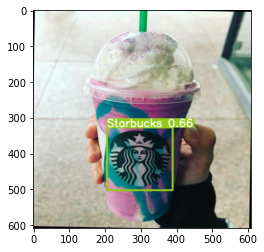

In [6]:
""" Here we can display our predictions on the images"""

detections_dir = "yolov5/runs/detect/exp11/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

## Defining the functions to evaluate IOU

As IOU is not directly returned among the metrics, we created our own formulas. The weighterd IOU also takes into consideration whether the prediction was right or wrong (the IOU in this case is zero when the image is wrongly predicted

In [7]:
def readFile(fileName):
    fileObj = open(fileName, "r") #opens the file in read mode
    lbs = fileObj.read().splitlines()
    llbs = [[float(fl) for fl in lb.split()] for lb in lbs] #puts the file into an array
    fileObj.close()
    return llbs

def getCoordinates(path): 
    
    labels = os.listdir(path)

    res = {}


    for label in labels: 
        img = label.replace(".txt", ".jpg")
        res[img] = readFile(path + label)

    df = pd.DataFrame(columns = ['image', 'class', 'x', 'y', 'w', 'h'])
    i = 0
    for key, val in res.items(): 
        for v in val: 
            cls, x, y, w, h = (v)
            df.loc[i] = {'image': key, 'class': cls, 'x' : x, 'y': y, 'w': w, 'h': h}
            i += 1
    return df

def unBoxing(cord): 
    x, y, w, h = (cord)
    
    w = w/2
    h = h/2
    
    box = [x-w, y-h, x+w, y+h]
    
    return box

def calc_iou(cordA, cordB):
    
    boxA = unBoxing(cordA)
    boxB = unBoxing(cordB)
    
    
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth===
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou


In [8]:
path_pred = 'yolov5/runs/detect/exp11/labels/'
path_true = 'data_yolov5/test/labels/'


df_pred = getCoordinates(path_pred)
df_true = getCoordinates(path_true)

In [9]:
df_all = pd.merge(df_pred, df_true, how = 'left', on = 'image', suffixes = ('_pred', '_true'))

df_all['iou'] = 0

for i in range(df_all.shape[0]):
    row = df_all.iloc[i]

    cols = ['x', 'y', 'w', 'h']
    cordA = row[[cc + '_pred' for cc in cols]]
    cordB = row[[cc + '_true' for cc in cols]]
    
    iou = calc_iou(cordA, cordB)
    
    df_all['iou'].iloc[i] = iou



/anaconda/envs/py38_default/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
# For the weighted iou
correct = []
for i in range(len(df_all)):
    if df_all.loc[i, 'class_pred'] == df_all.loc[i, 'class_true']:
        correct.append(1)
    else:
        correct.append(0)
df_all['correct'] = correct

df_all['weighted_iou'] = df_all.correct * df_all.iou

In [11]:
print(f'IOU tot: {df_all.iou.mean()}')

print(f'IOU weighted: {df_all.weighted_iou.mean()}')

IOU tot: 0.9025617249390867
IOU weighted: 0.8960067235823628


In [12]:
df_all.groupby('class_true').agg({'iou': 'mean'})

,iou
class_true,
0.0,0.880664
1.0,0.926974
2.0,0.894508
3.0,0.931509
4.0,0.915317
5.0,0.934011
6.0,0.906355
7.0,0.879792
8.0,0.854437


In [13]:
df_all.groupby('class_true').agg({'weighted_iou': 'mean'})

,weighted_iou
class_true,
0.0,0.877247
1.0,0.918804
2.0,0.883847
3.0,0.927352
4.0,0.903644
5.0,0.930096
6.0,0.898582
7.0,0.877551
8.0,0.842146
